In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from plots import ForexPlotter

from data_handle import (
    ForexDataClean,
    ForexDataLoad,
)

from features import (
    ForexMomentumIndicators,
    ForexTrendIndicators,
    ForexVolatilityIndicators,
    ForexVolumeIndicators,
    ForexMASignals,
    ForexMACDSignals,
    ForexADXSignals,
    ForexParabolicSARSignals,
    ForexRSISignals,
    ForexStochasticSignals,
    ForexWilliamsRSignals,
    ForexCCISignals,
    ForexATRSignals
)

import warnings
warnings.filterwarnings('ignore')

data = ForexDataLoad(file_path = '../data/xauaud.csv').data
ohlcv_data = ForexDataLoad(file_path = '../data/xauaud.csv').data

cleaner = ForexDataClean(data = data)
data = cleaner.fast_cleaner()

momentum_data = ForexMomentumIndicators(data = data,).generate_all_momentum_indicators(
    stoch_fk_sk_sd_periods = [[14, 3, 3], [28, 6, 6]],
    rsi_periods = [[14, 21, 28], [9, 16, 18]],
    williams_periods = [[14, 21, 28], [9, 16, 18]],
    momentum_periods = [[14, 21, 28], [9, 16, 18], [10, 14, 20]],
    cci_periods = [[14, 21, 28], [9, 16, 18]],
)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_from_database
Data loaded successfully!
Shape: (38217, 5)

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers 
5 fast_cleaner
Keep = first and subset = None
Removed 0 duplicate entries
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent
Found 1 missing values
 dropped: 1 missing values .
OHLC DATA INTEGRITY VALIDATION
No OHLC integrity violations found
All OHLC values are consistent
MOMENTUM INDICATORS
 Available Fuctions 
1 add_rsi 
2 add_stochastic 
3 add_williams_r 
4 add_cci 
5 add_momentum 
6 generate_all_momentum_indicators
Data Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 61 columns):
 #   Colum

In [2]:
williamas_signals = ForexWilliamsRSignals(
    data = momentum_data[0],
    parameters = momentum_data[1]['williams_r_params']
)

WILLIAMS %R SIGNAL GENERATION
Available functions: 
1 williams_overbought_oversold_signals 
2 williams_momentum_signals 
3 williams_reversal_signals 
4 williams_divergence_signals 
5 generate_all_williams_signals


In [3]:
momentum_signals_data = williamas_signals.generate_all_williams_signals()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38216 entries, 2017-04-24 02:00:00 to 2025-09-05 20:00:00
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   close                              38216 non-null  float64
 1   williams_r_14_overbought_oversold  38216 non-null  int64  
 2   williams_r_21_overbought_oversold  38216 non-null  int64  
 3   williams_r_28_overbought_oversold  38216 non-null  int64  
 4   williams_r_9_overbought_oversold   38216 non-null  int64  
 5   williams_r_16_overbought_oversold  38216 non-null  int64  
 6   williams_r_18_overbought_oversold  38216 non-null  int64  
 7   williams_r_14_slope_momentum       38216 non-null  int64  
 8   williams_r_21_slope_momentum       38216 non-null  int64  
 9   williams_r_28_slope_momentum       38216 non-null  int64  
 10  williams_r_9_slope_momentum        38216 non-null  int64  
 11  williams_r_16_slope

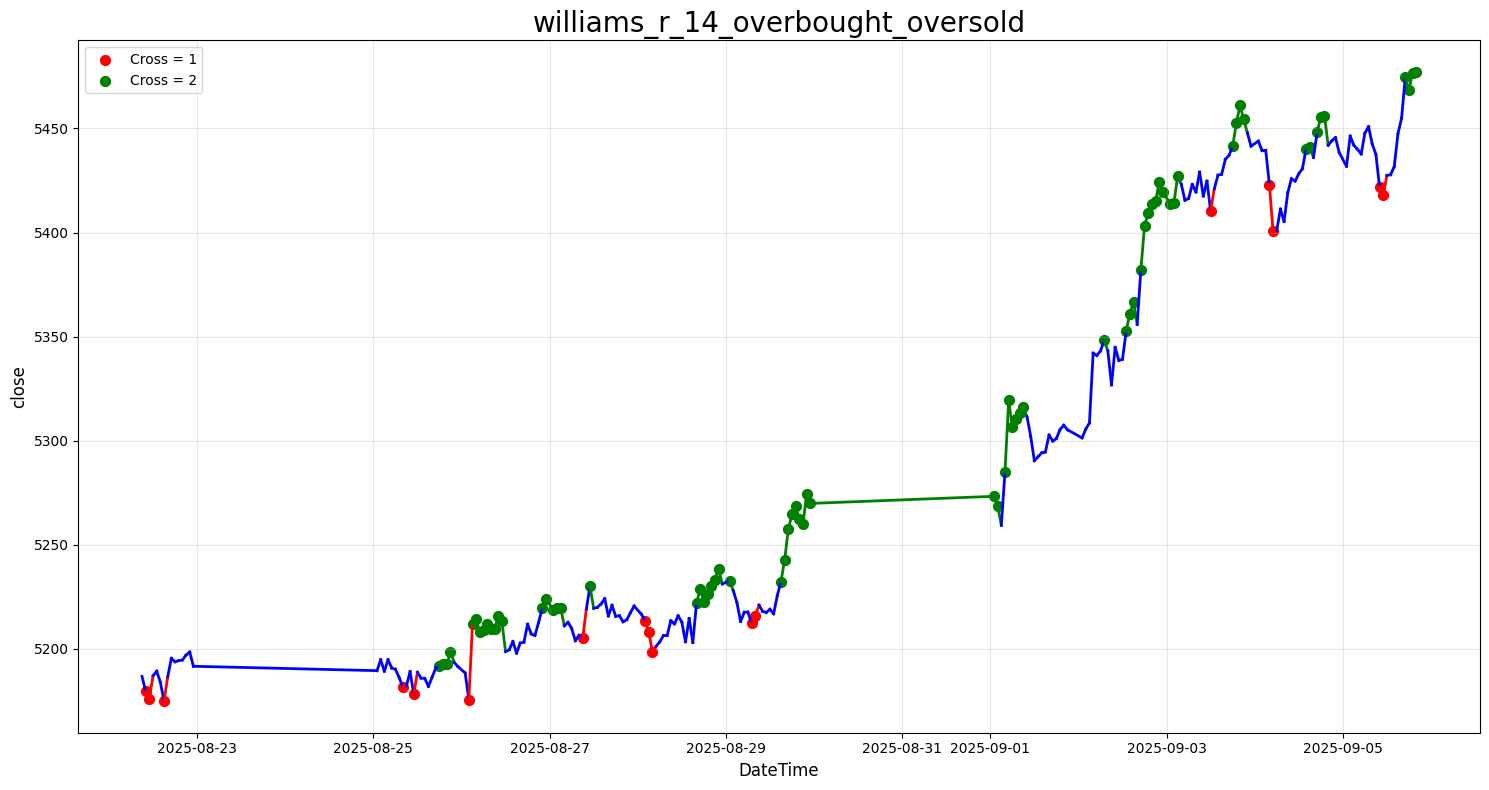

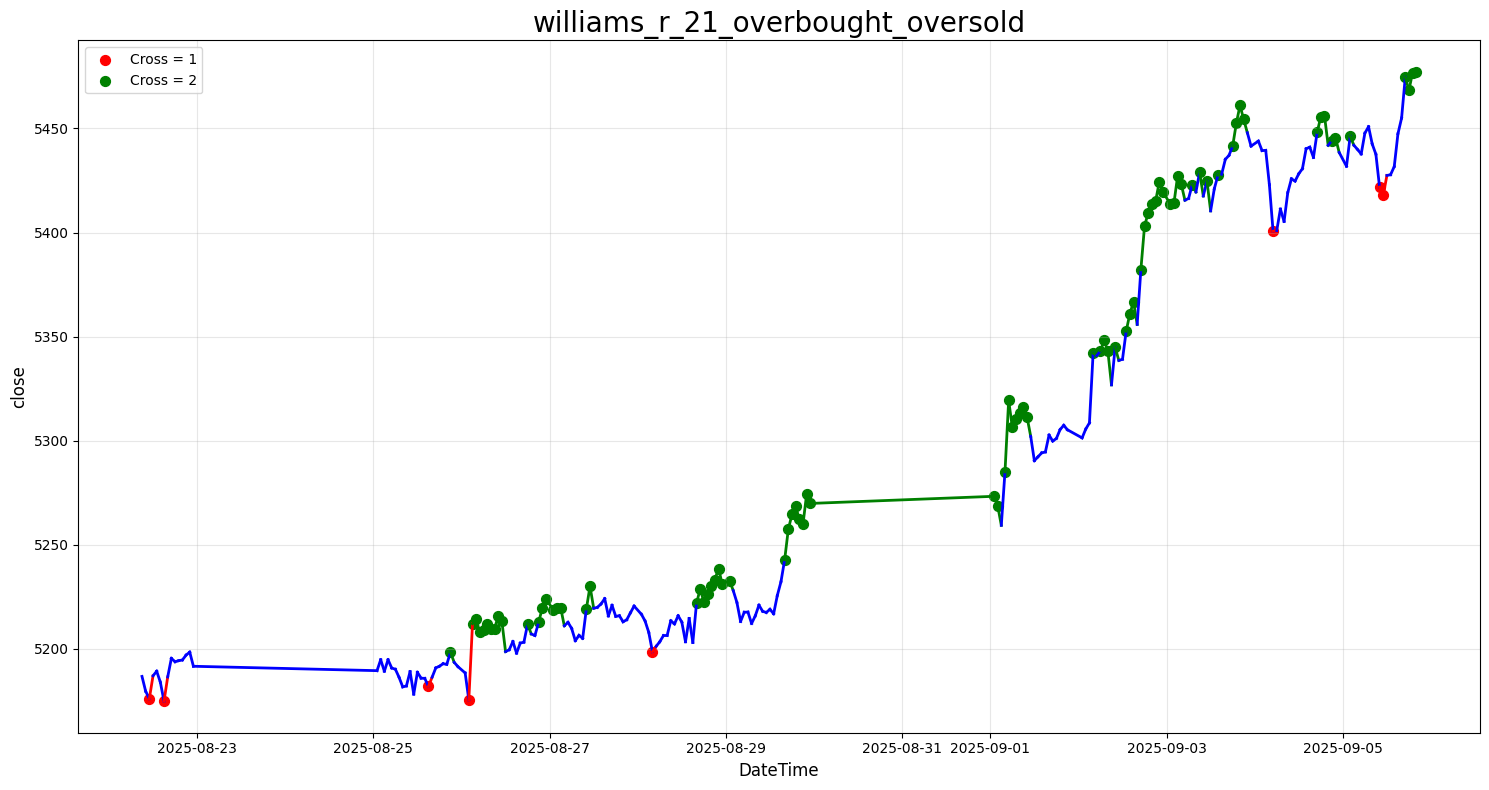

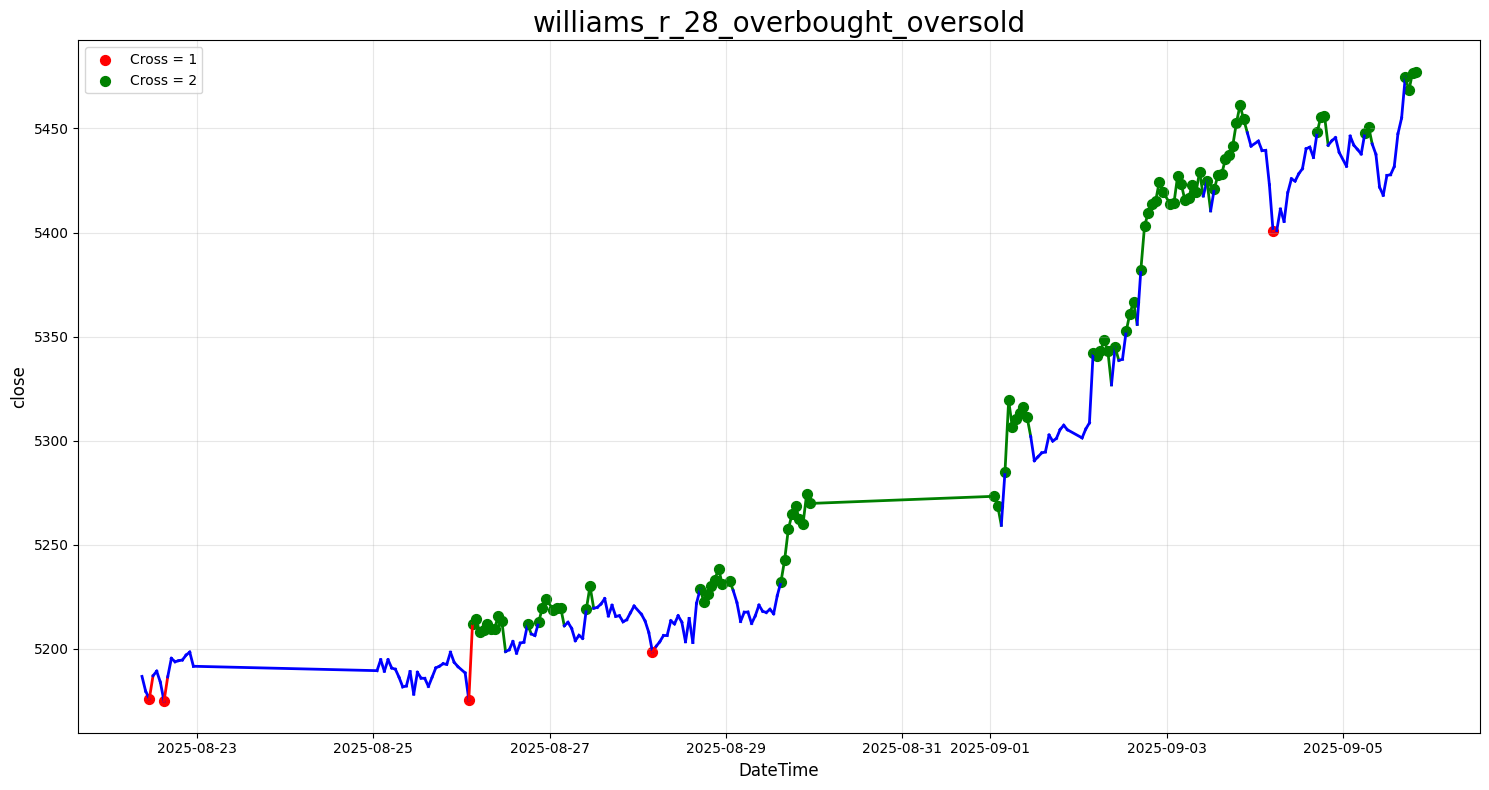

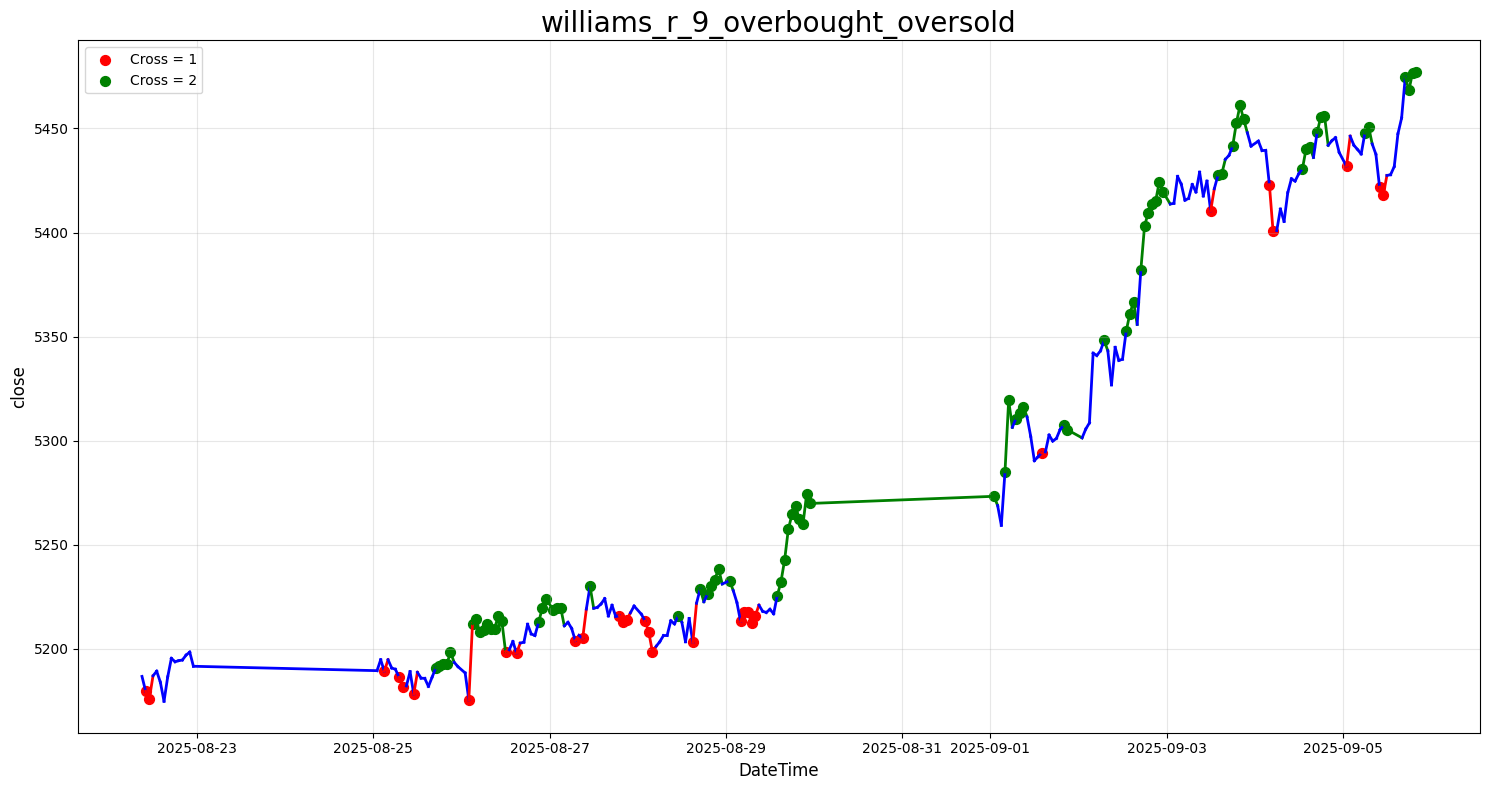

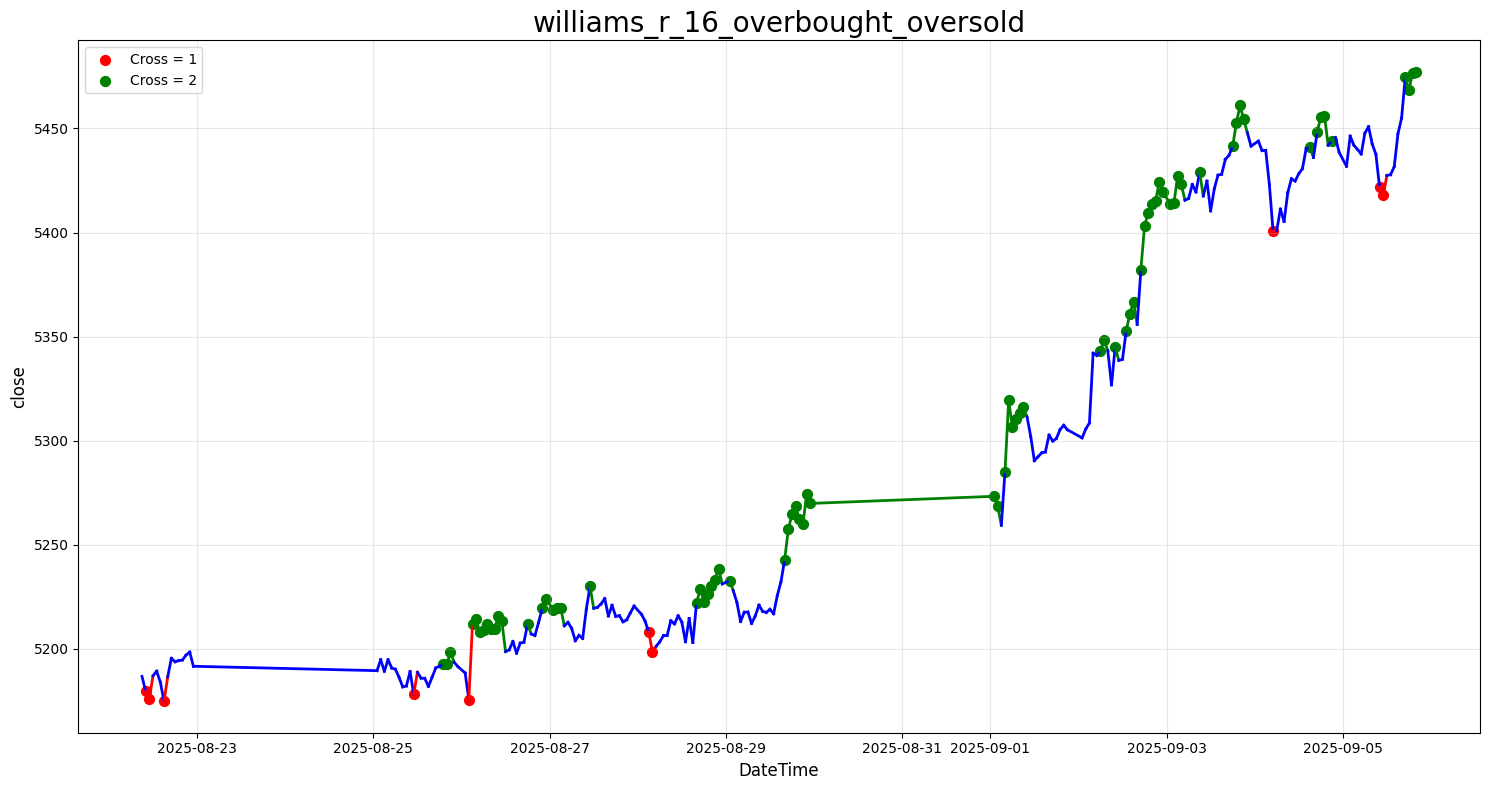

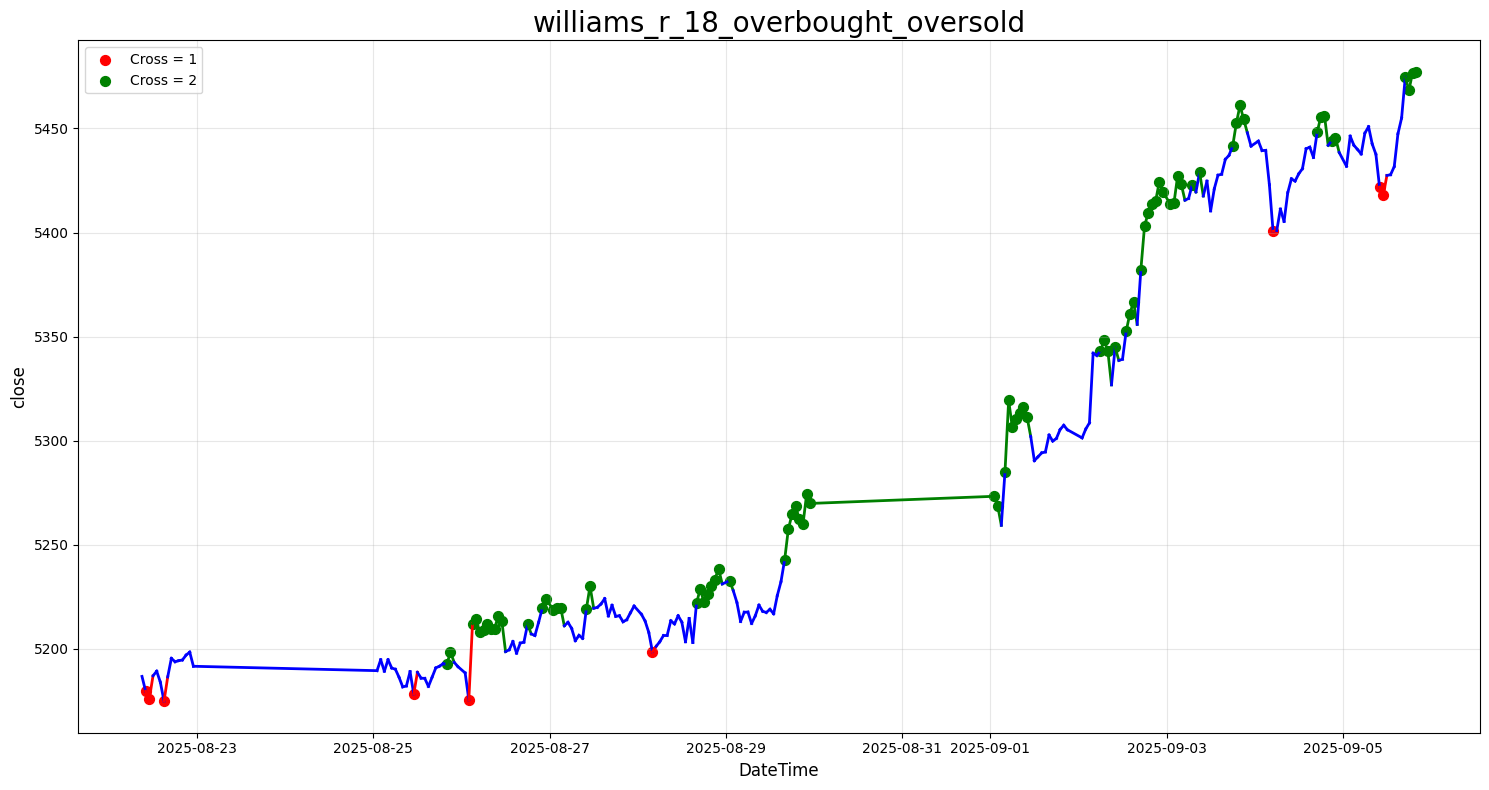

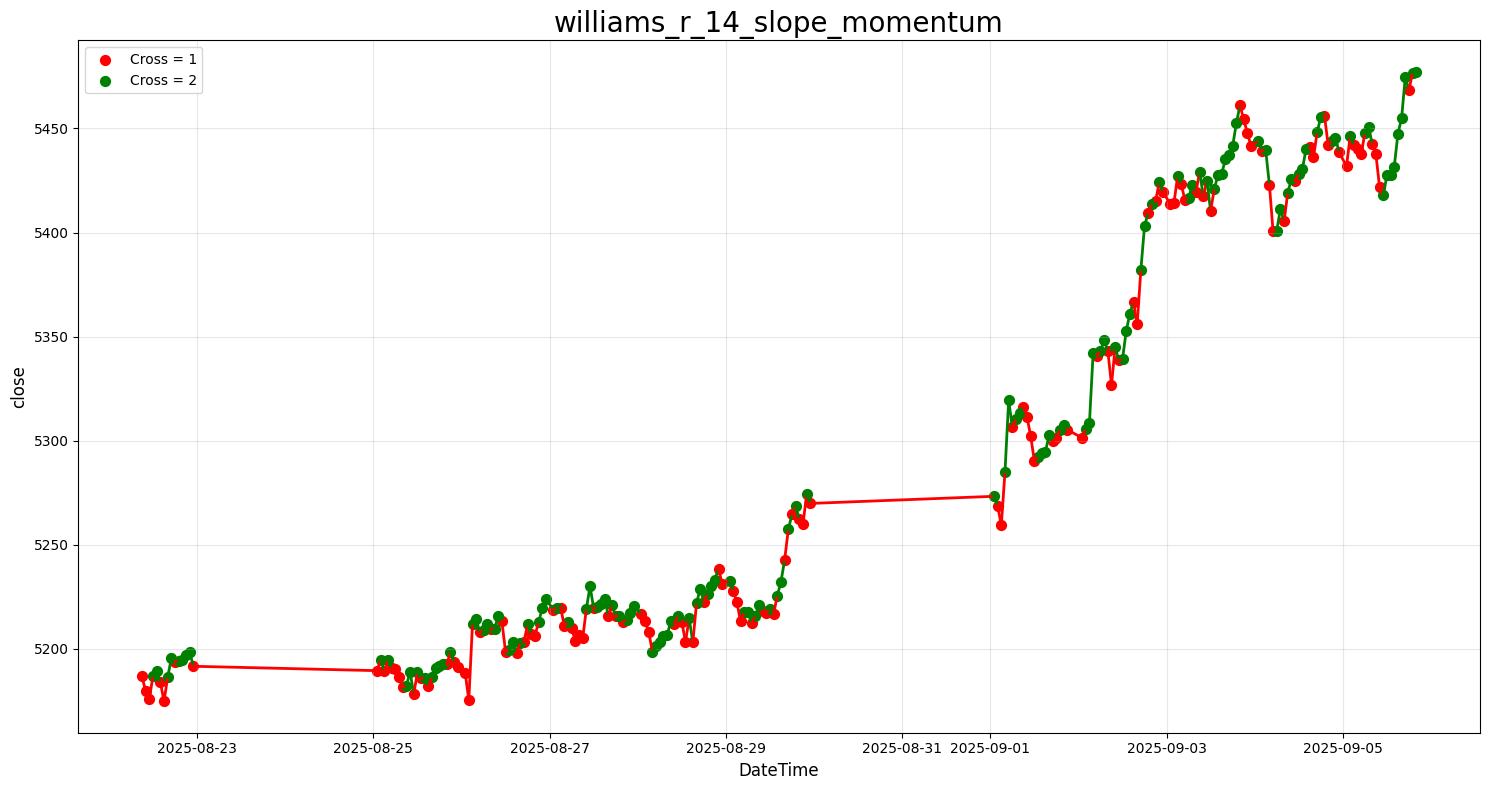

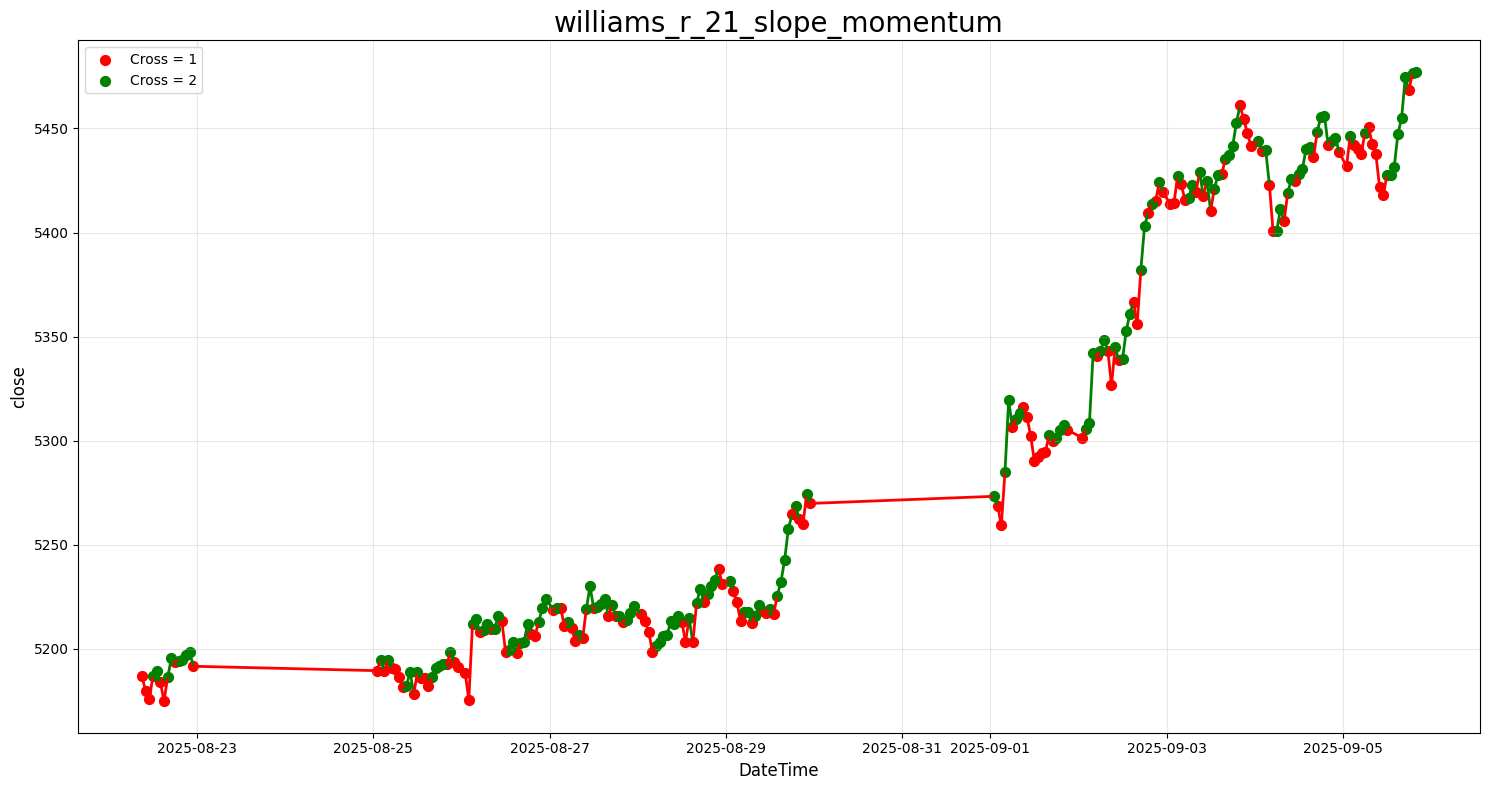

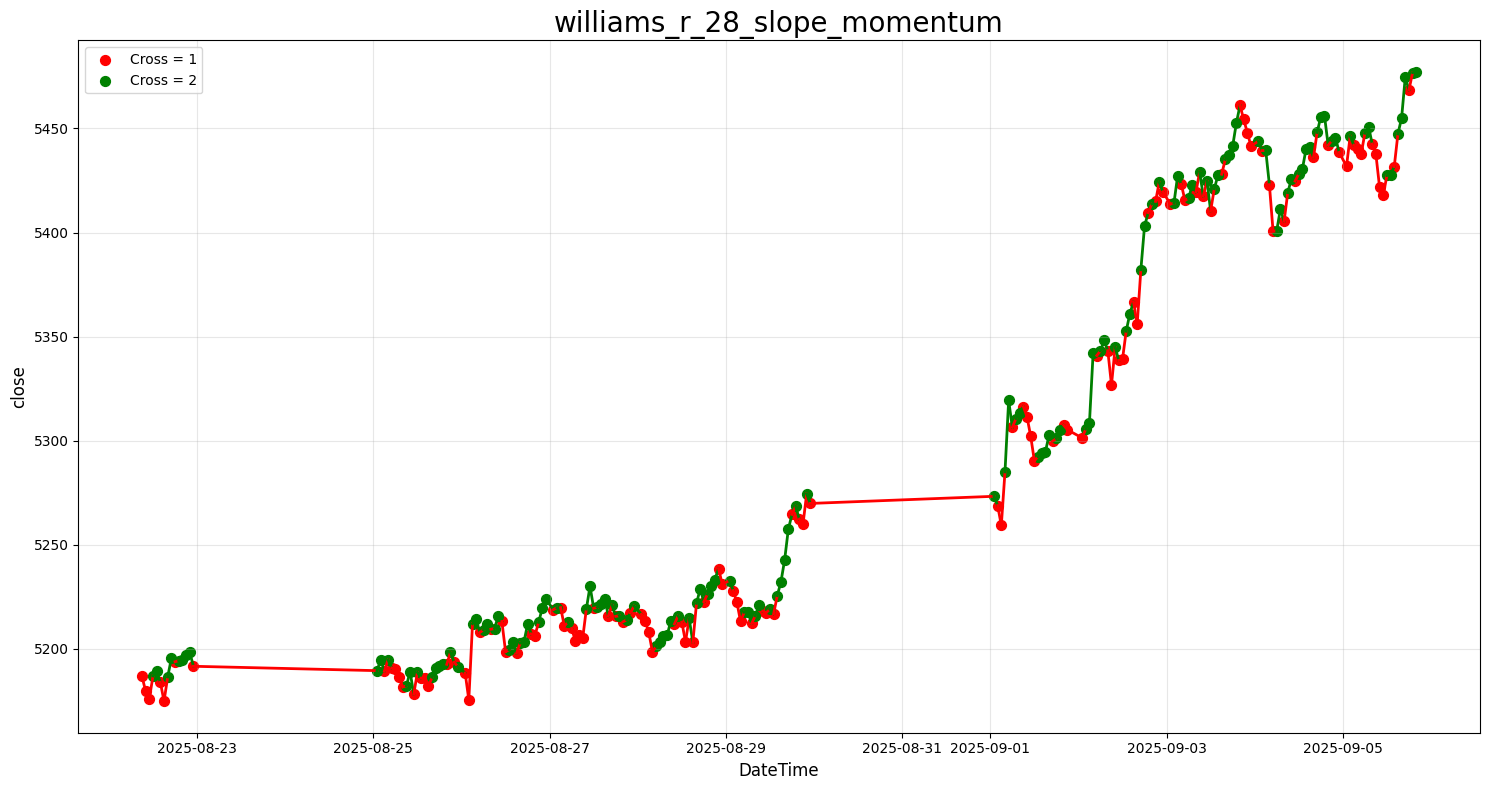

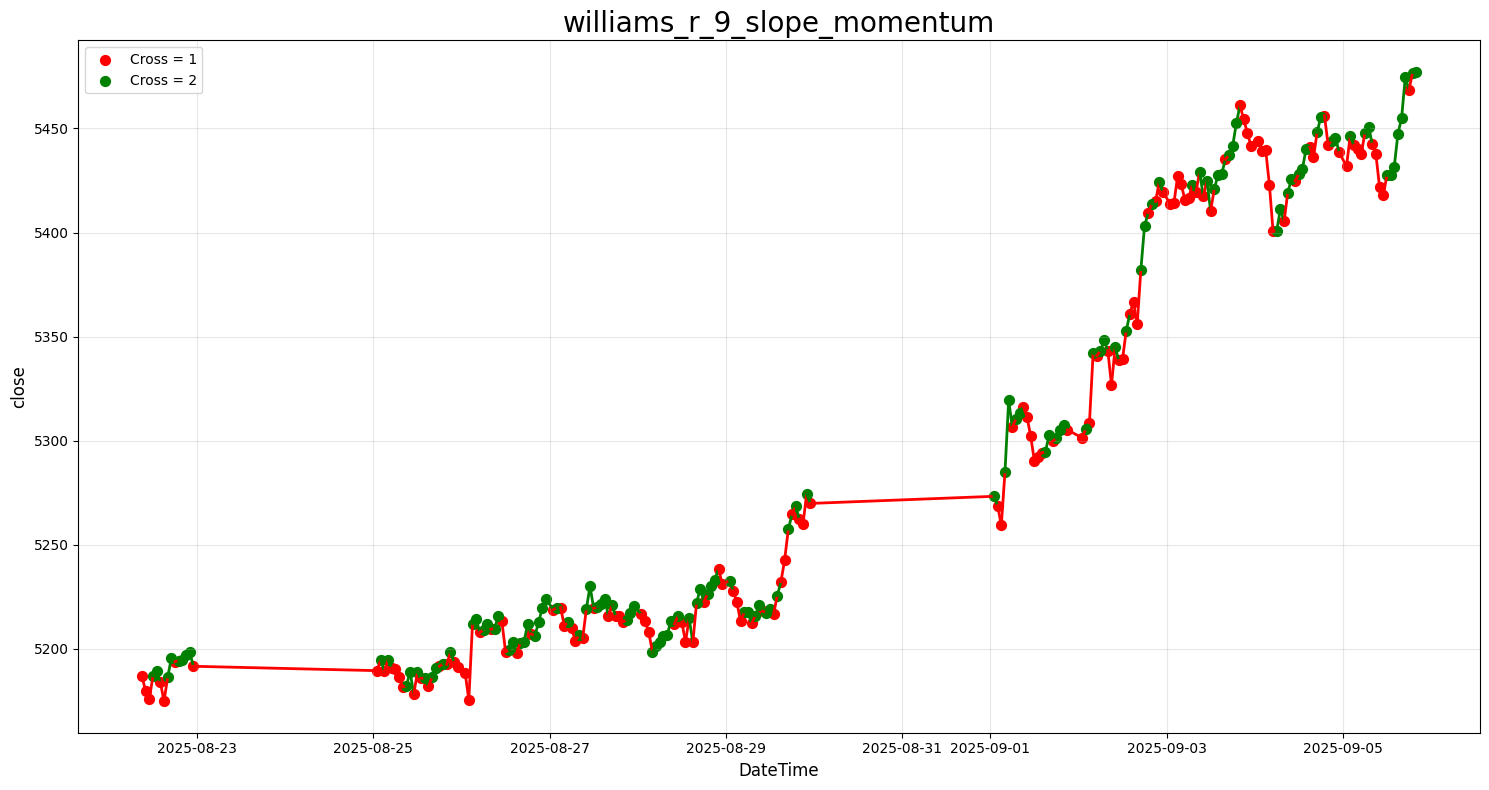

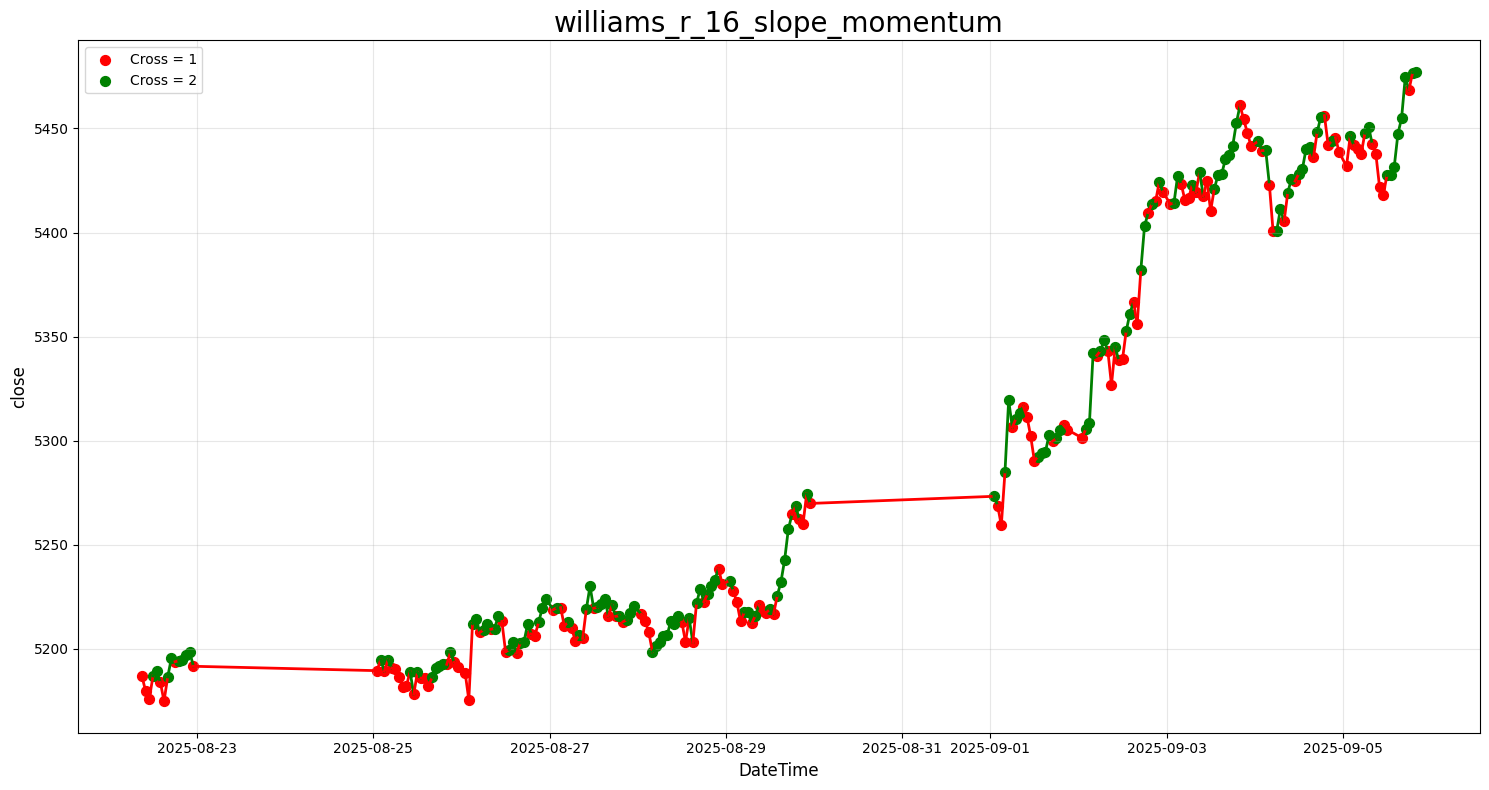

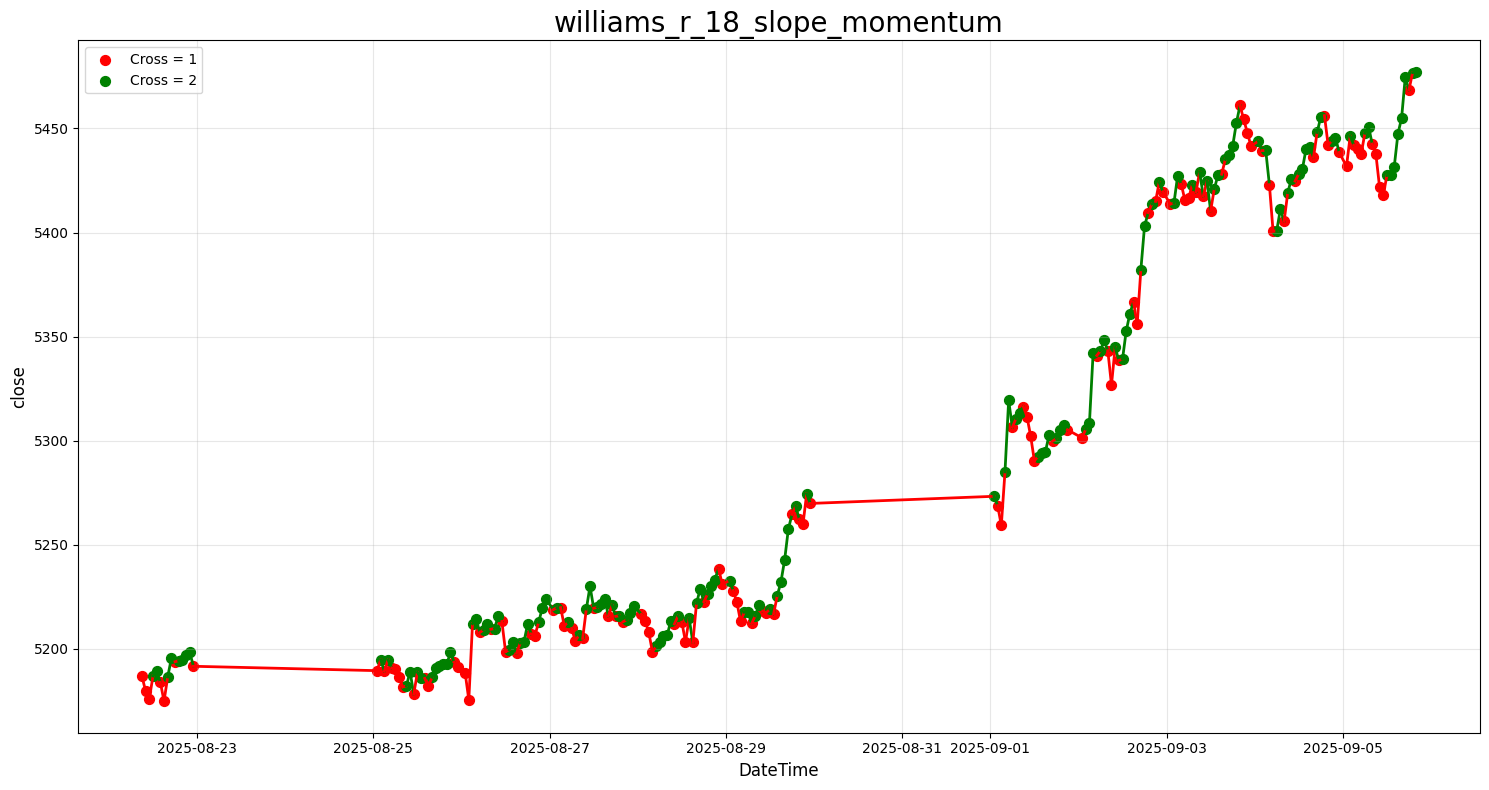

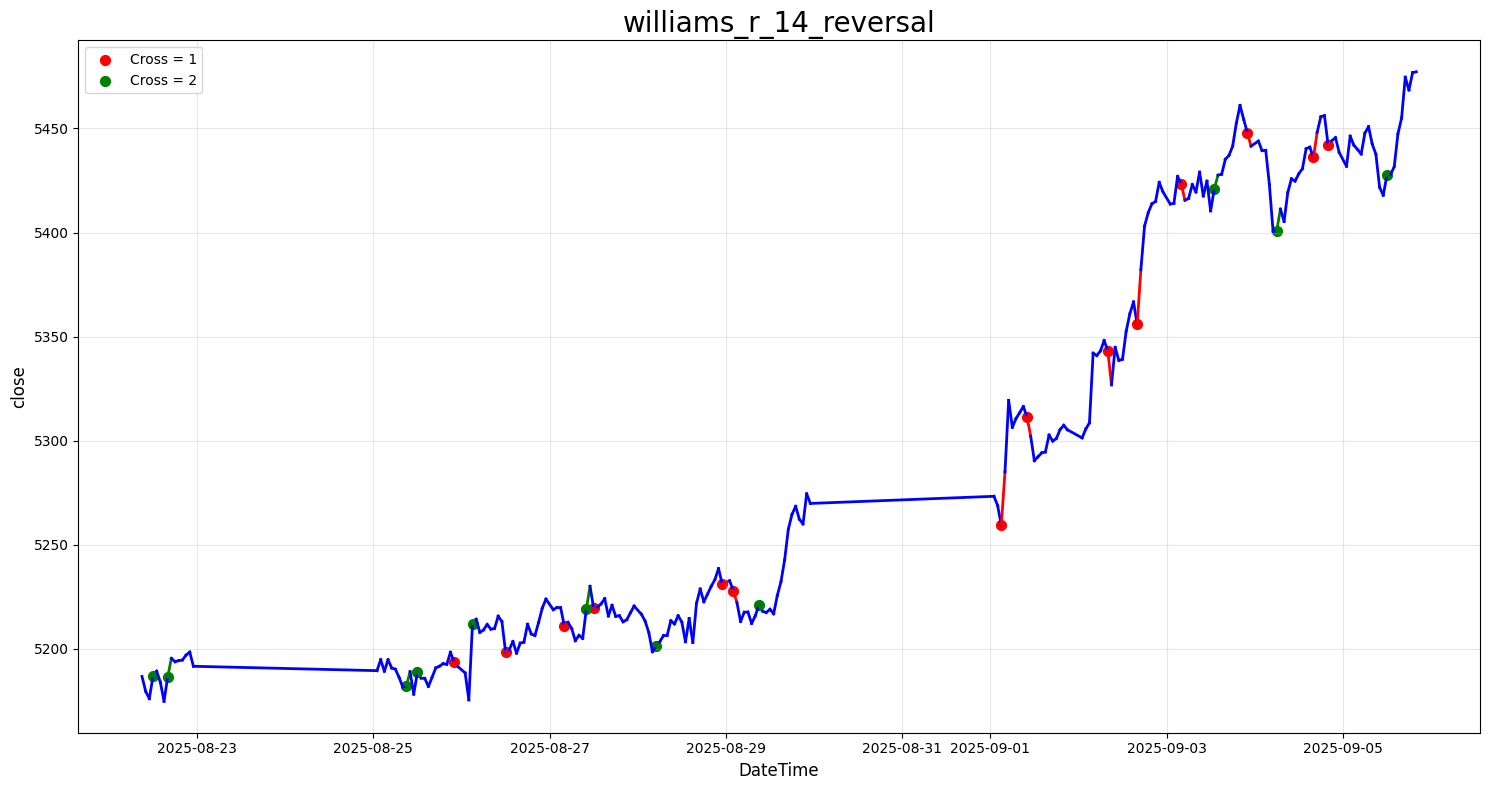

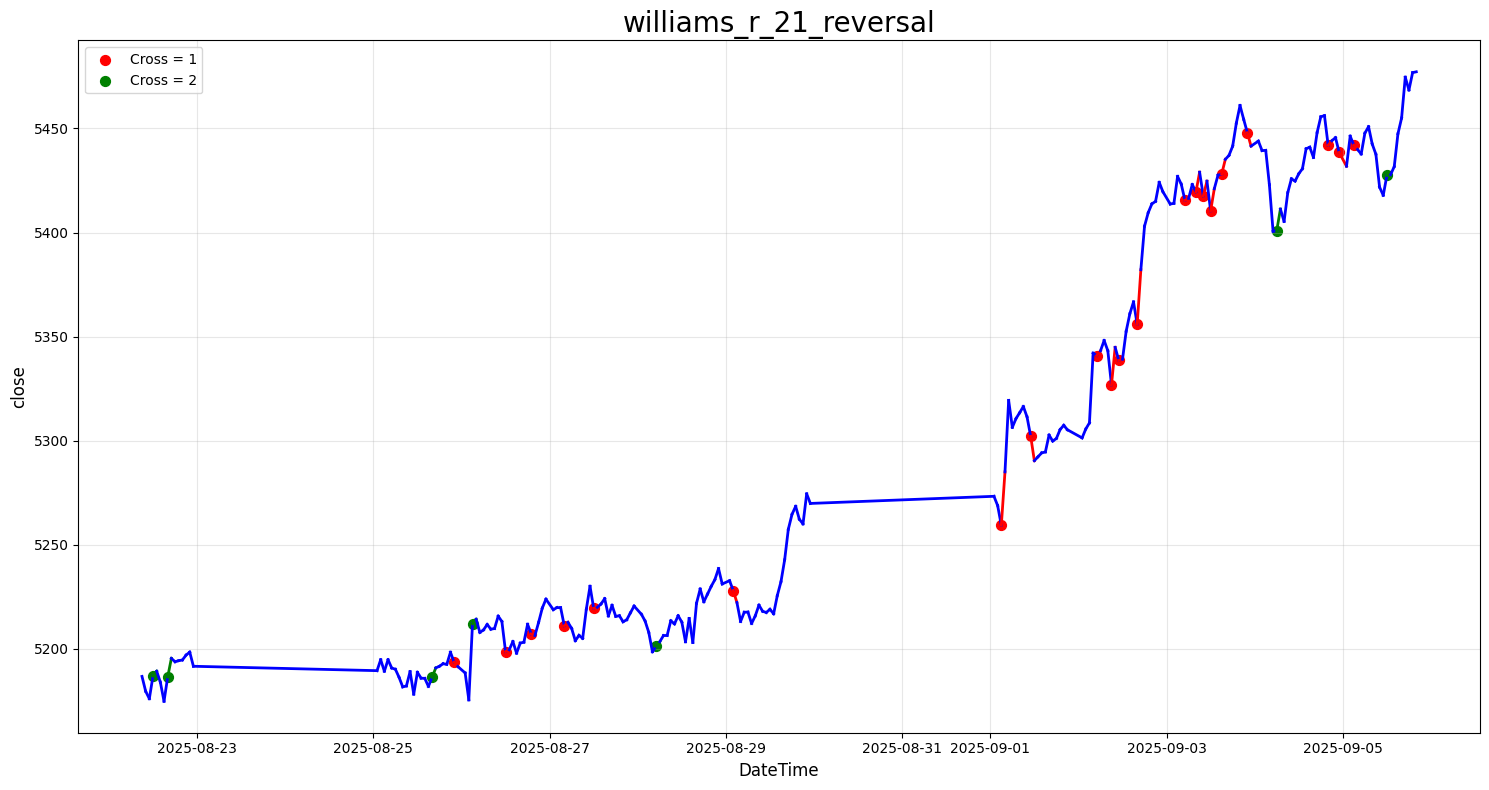

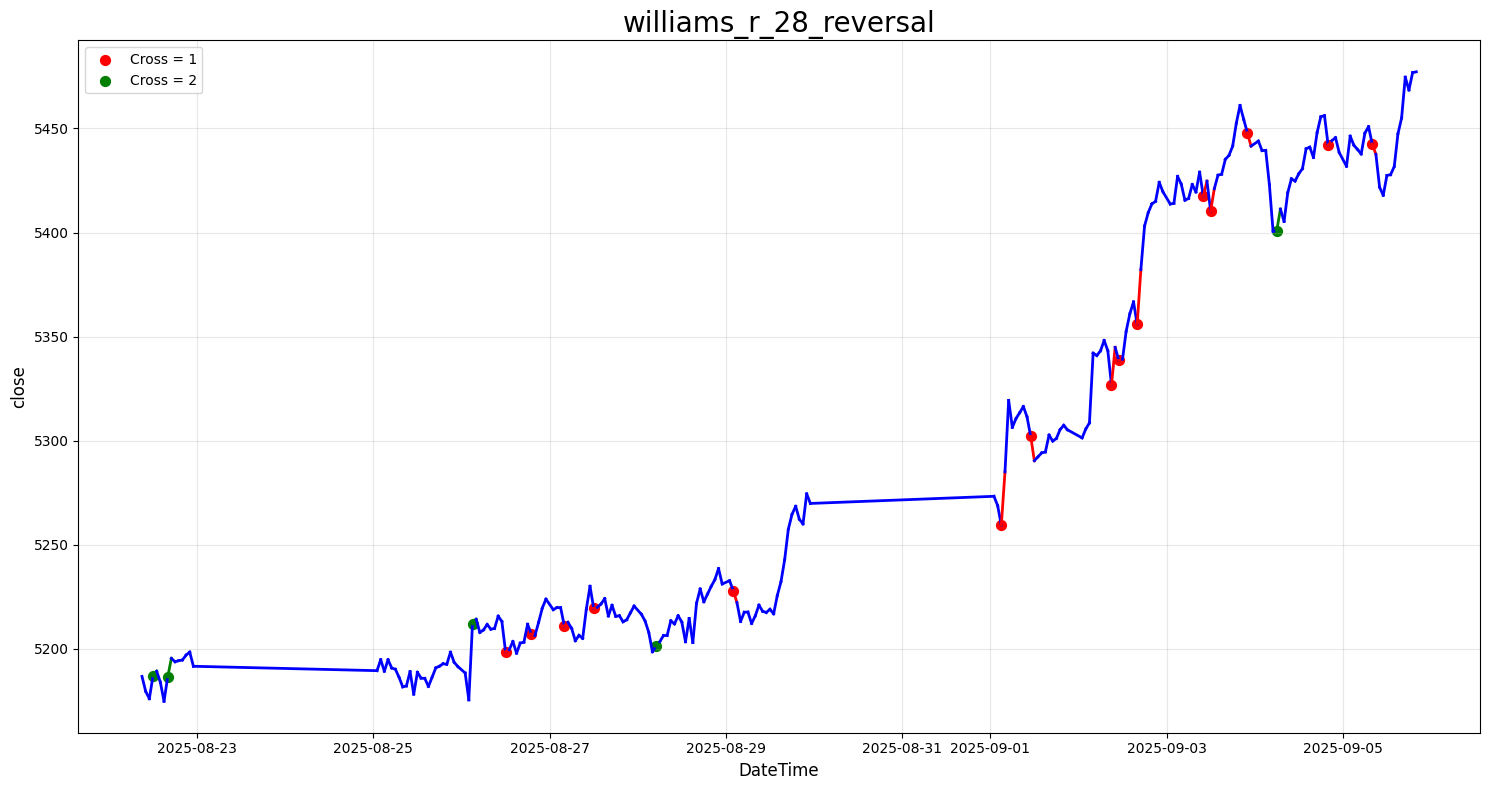

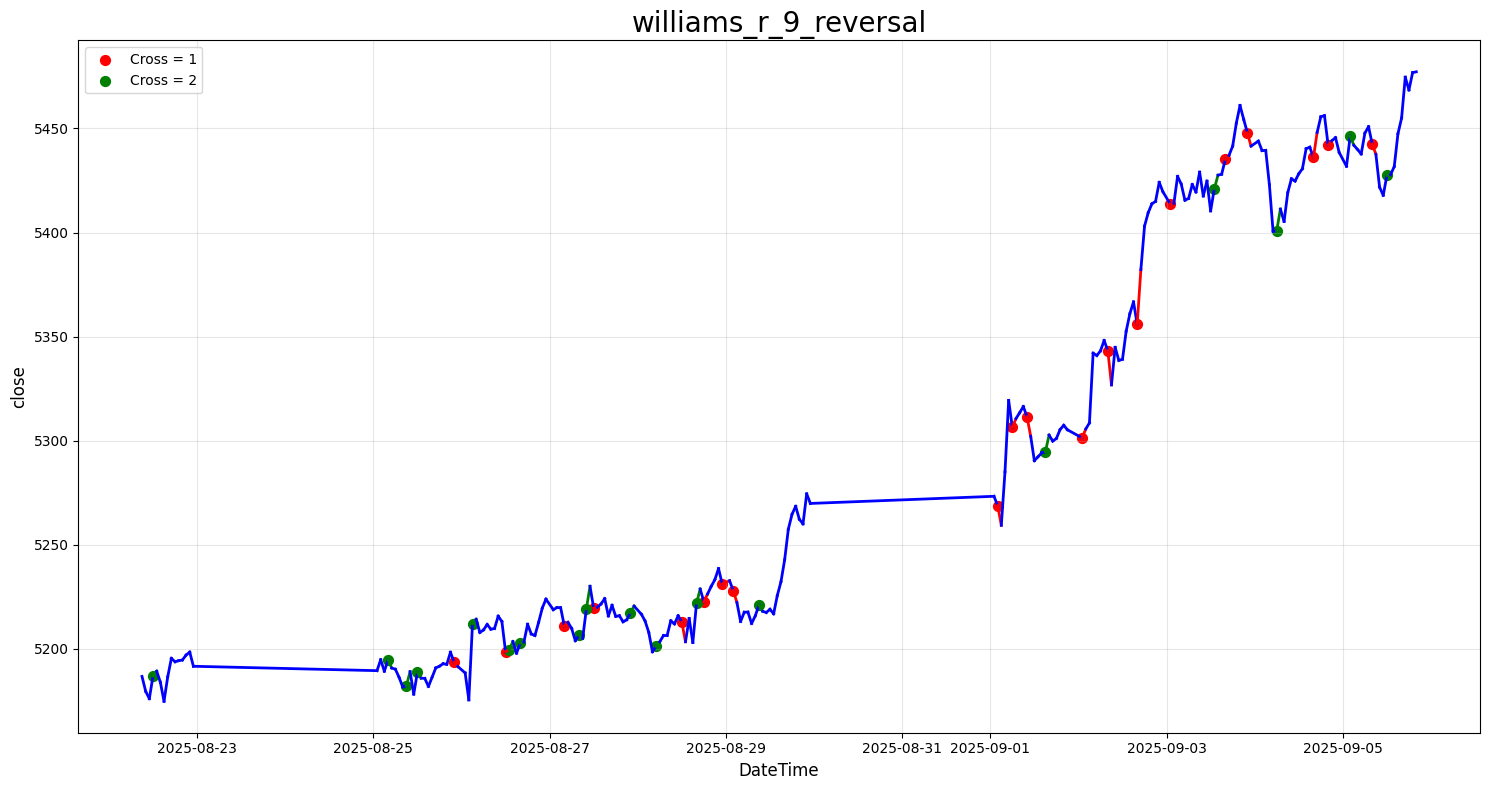

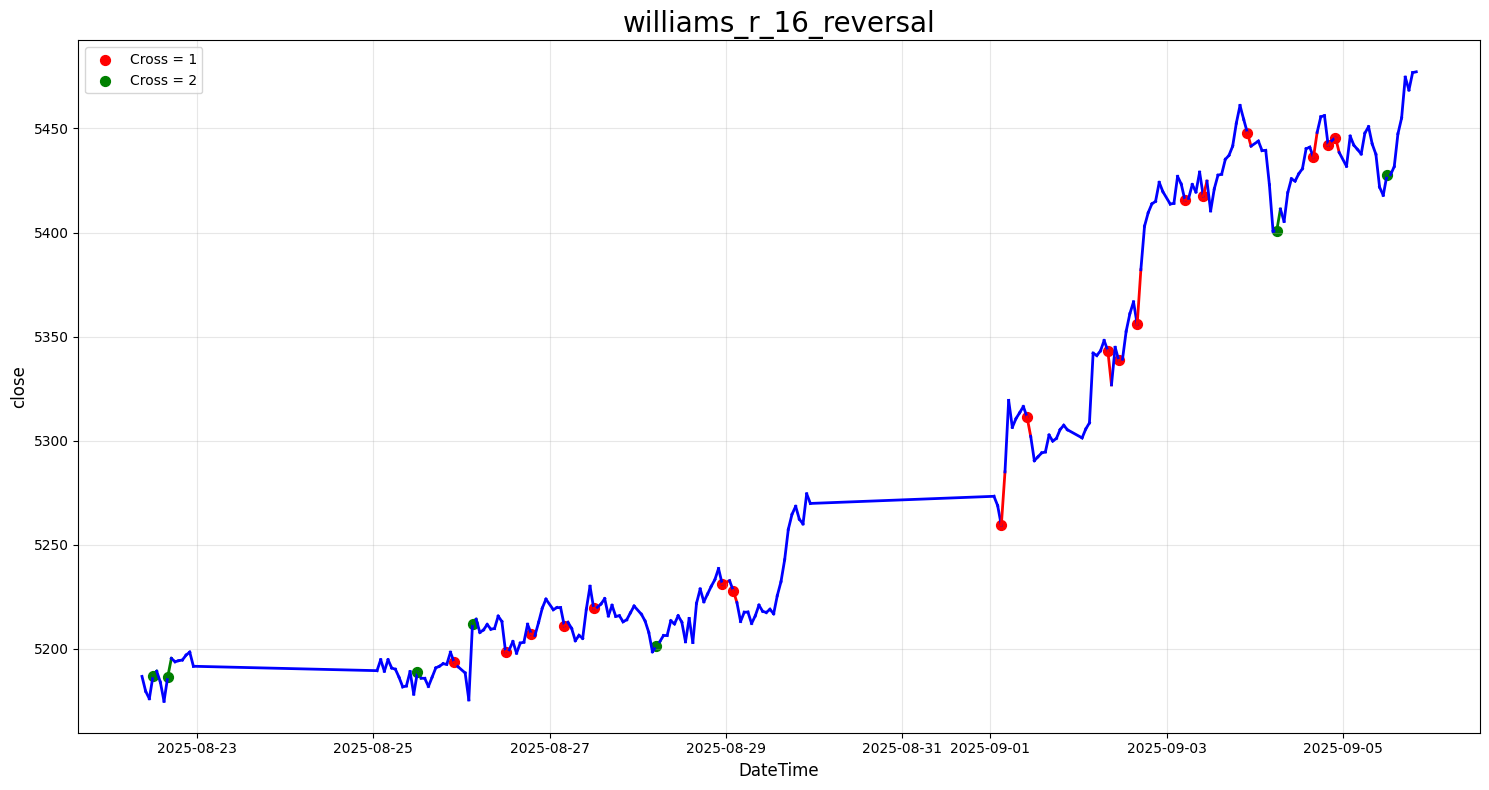

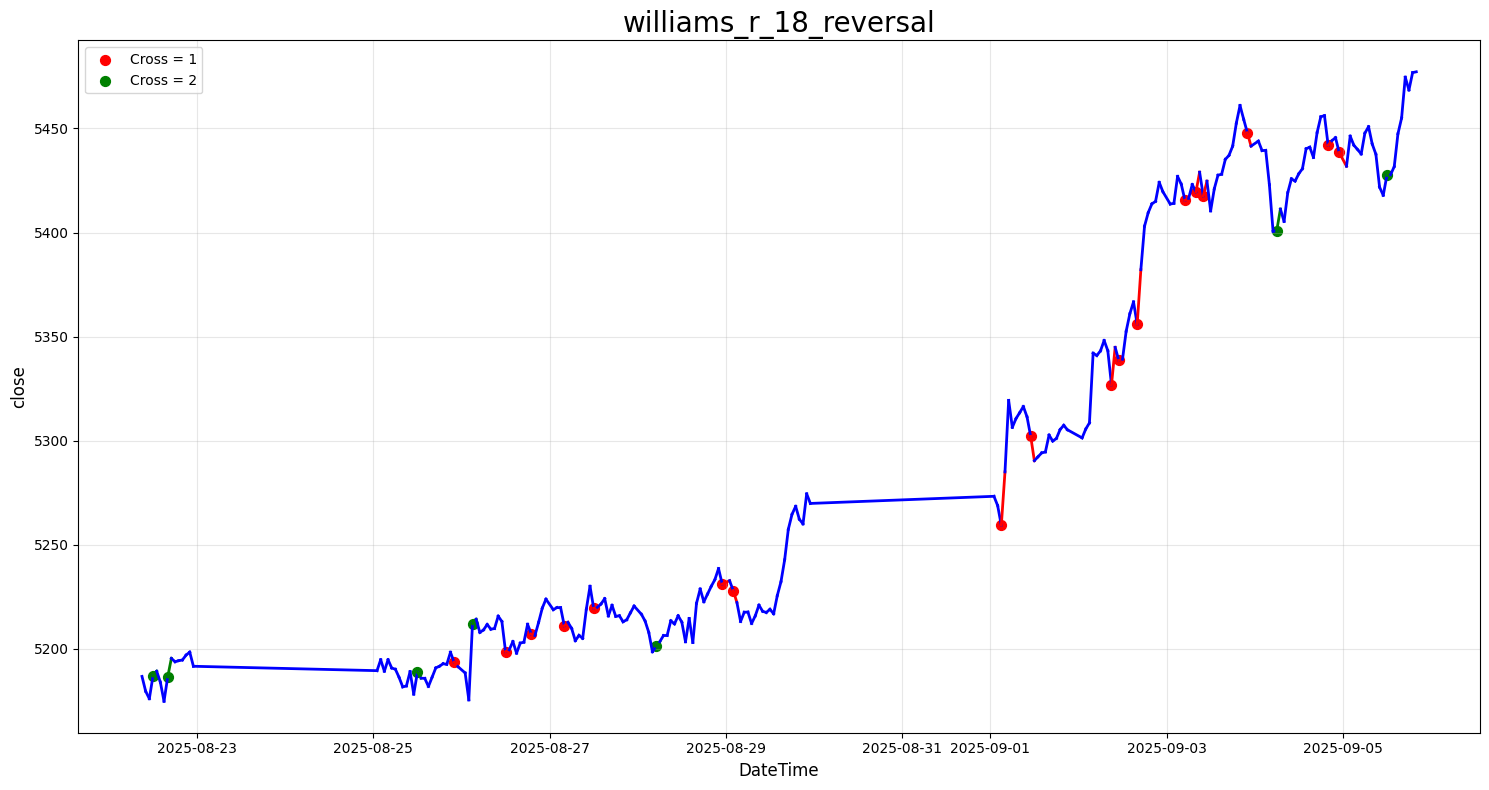

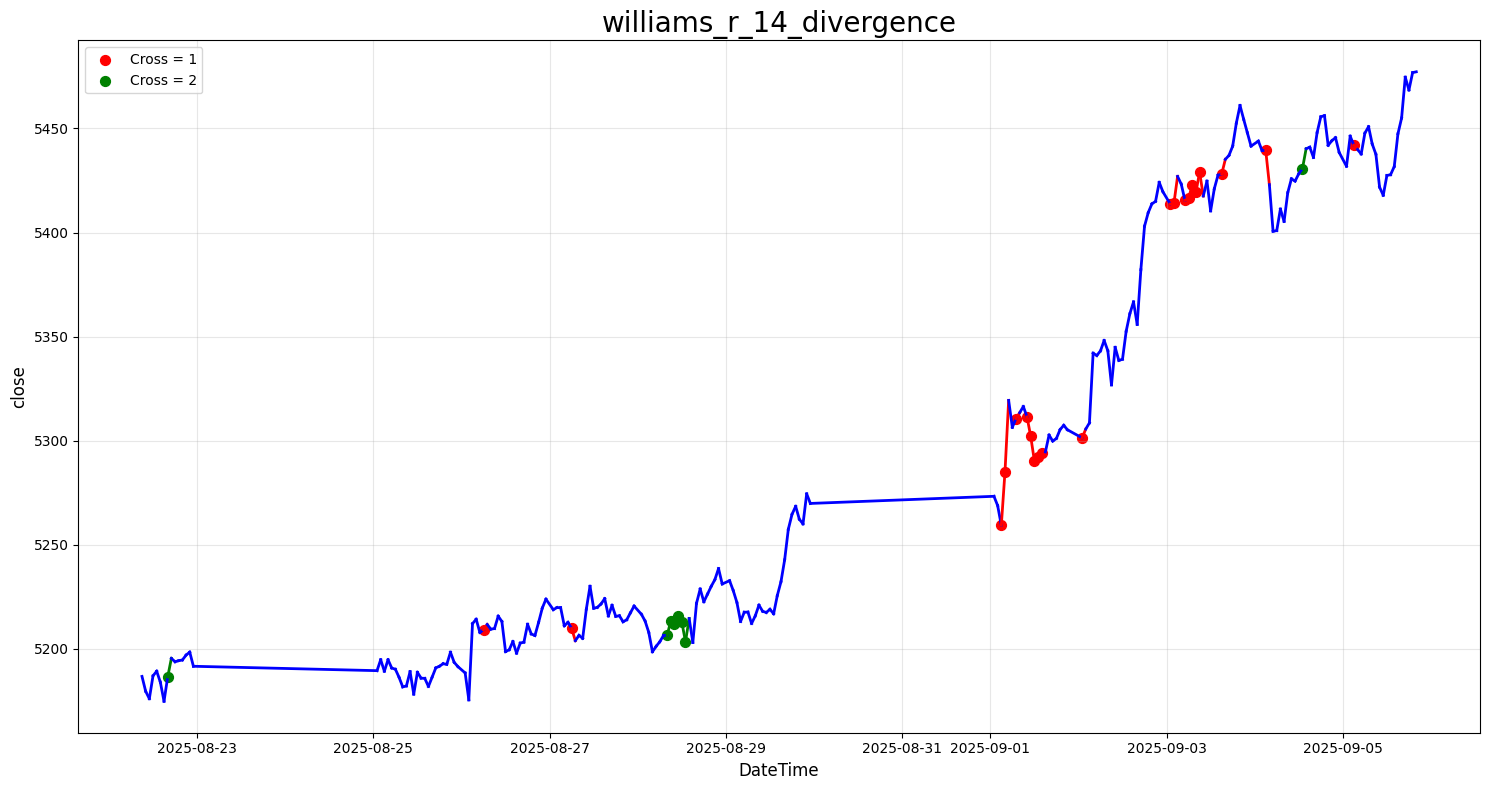

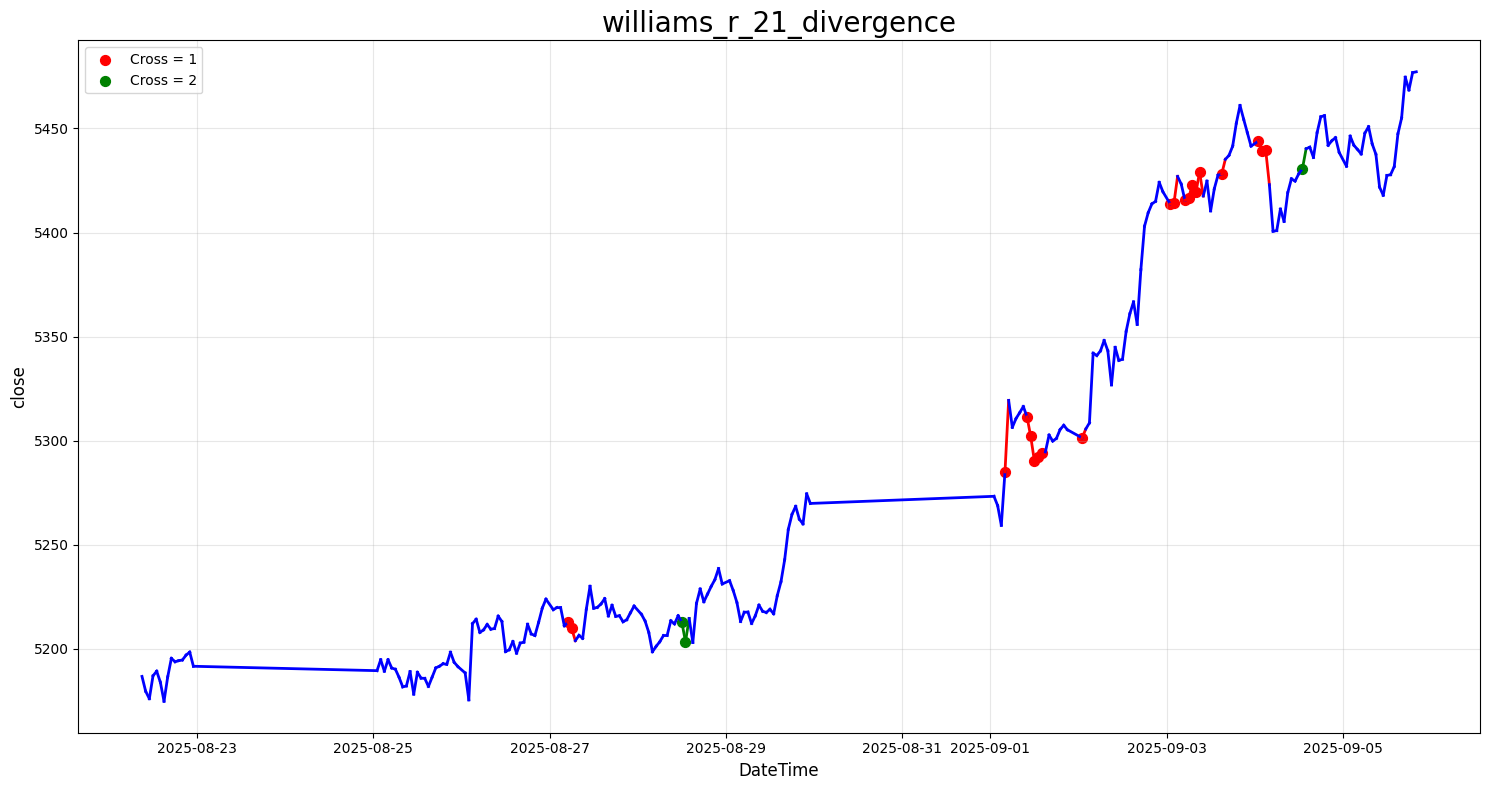

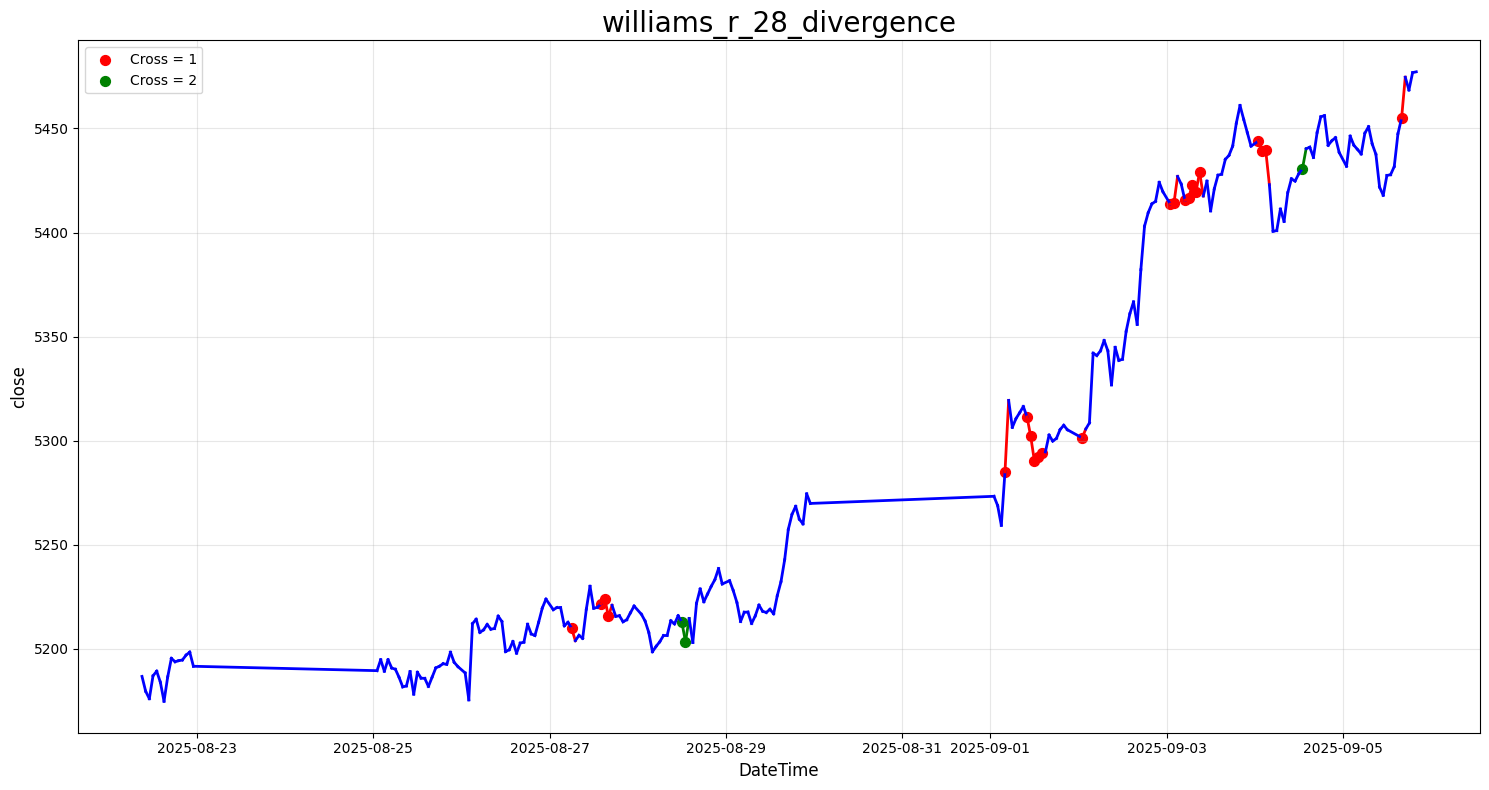

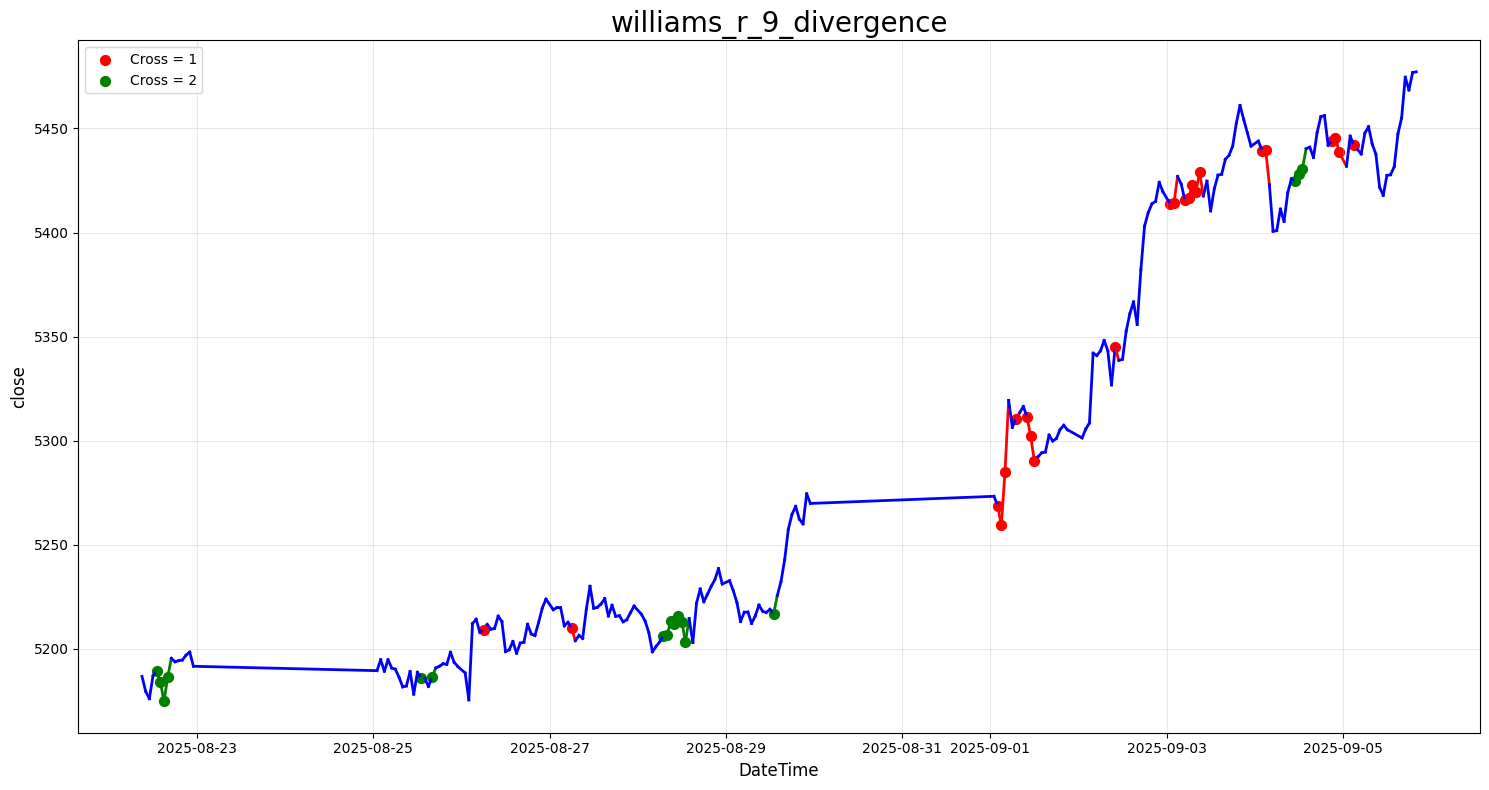

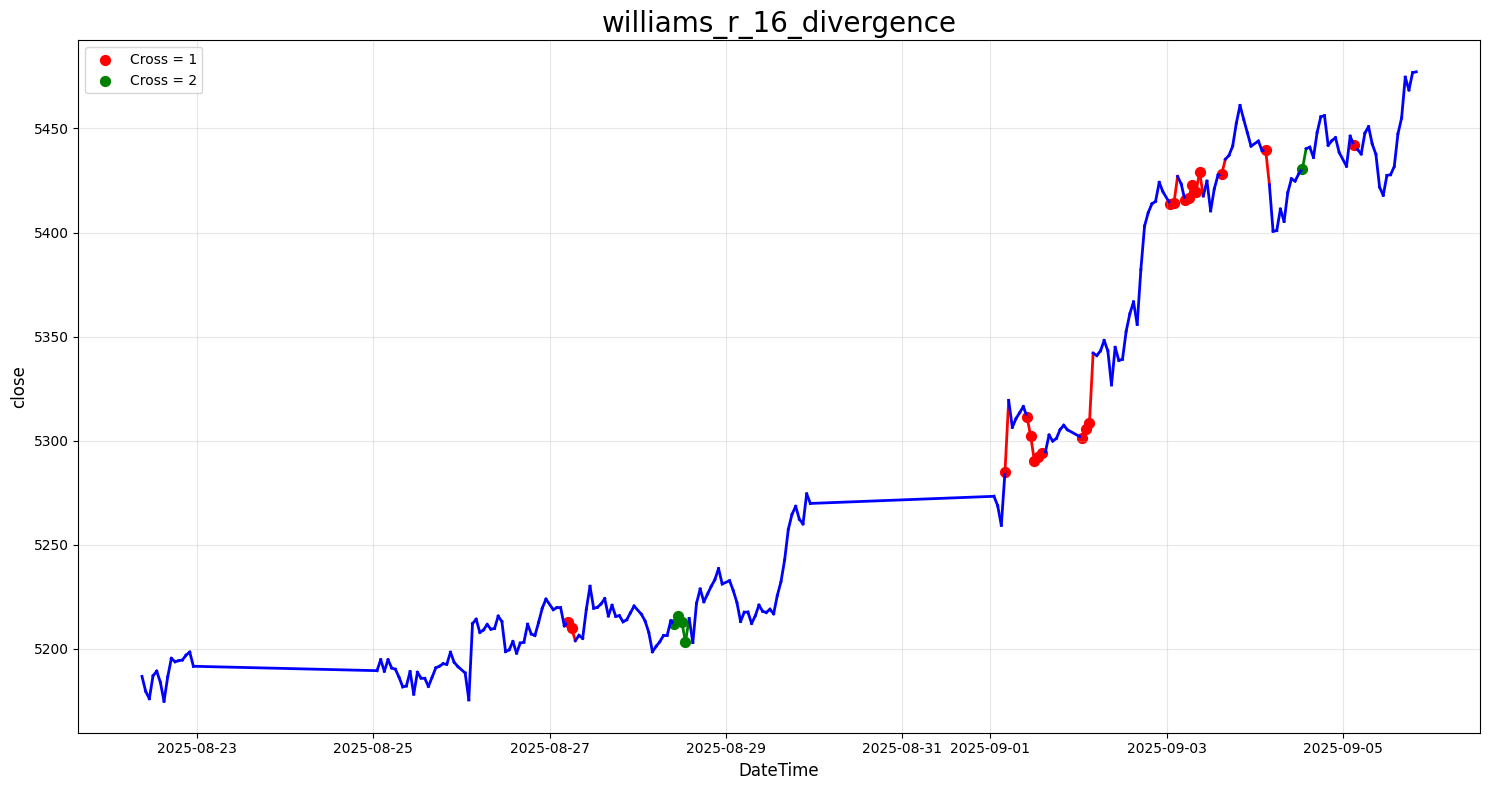

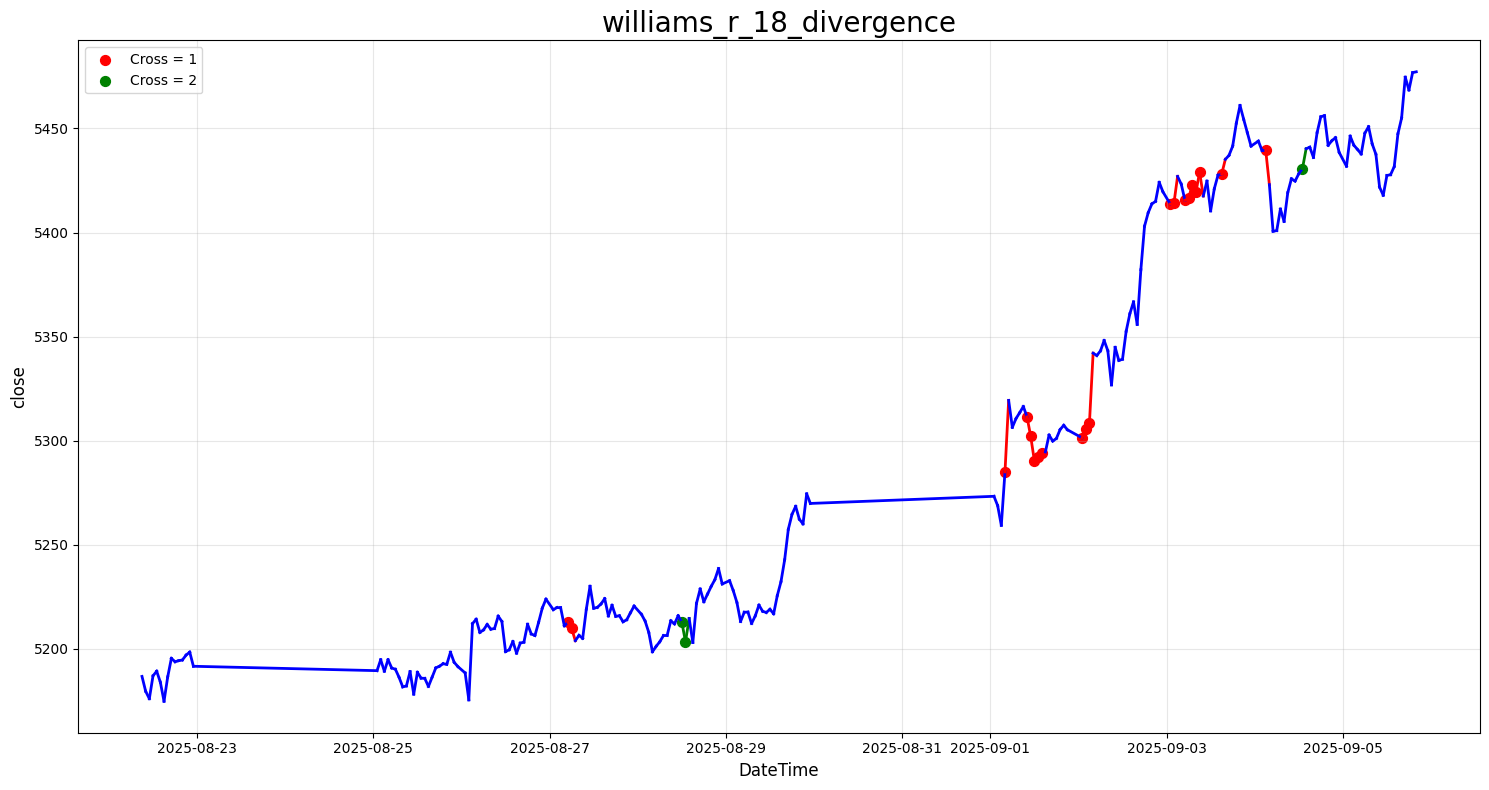

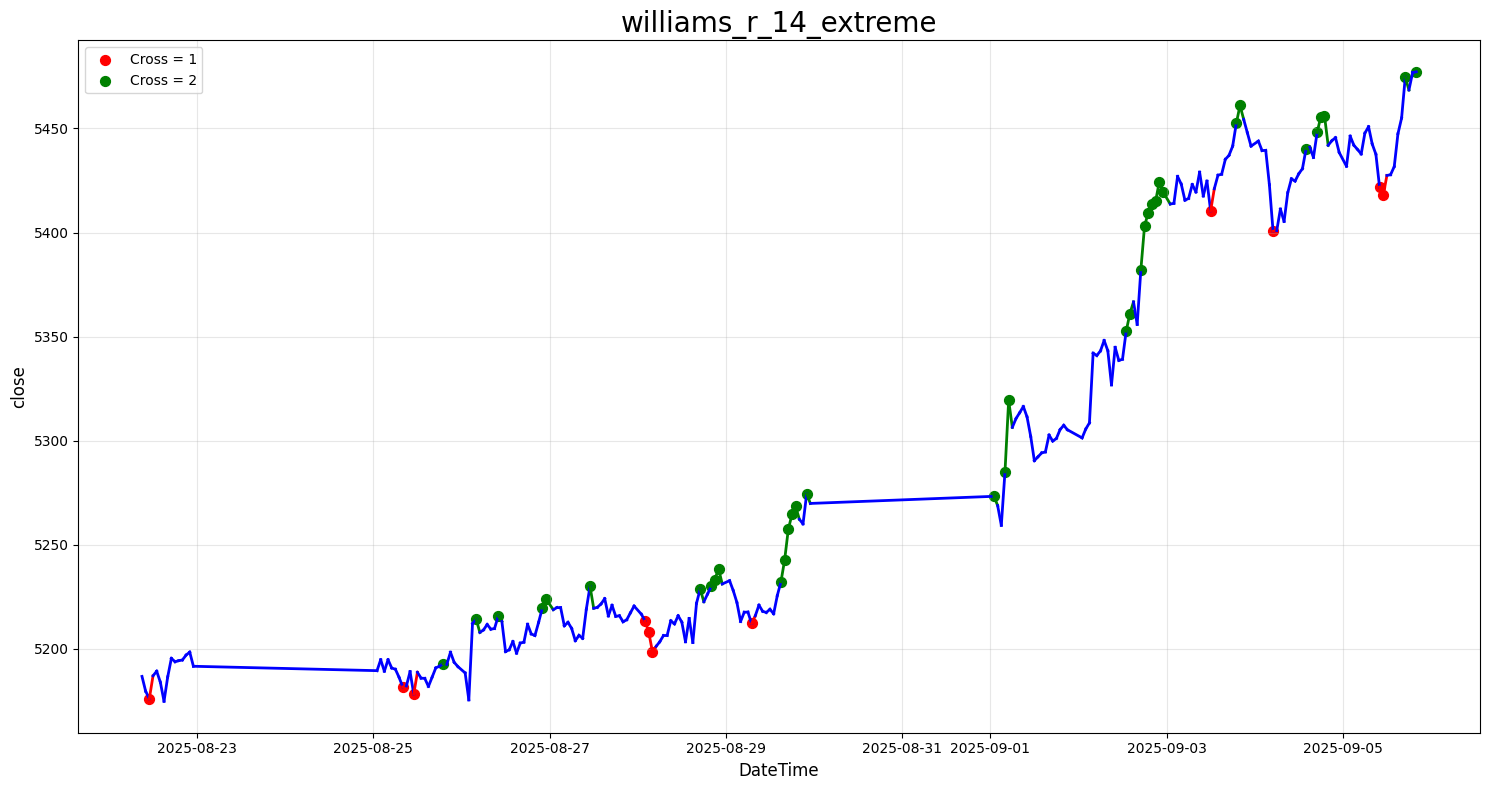

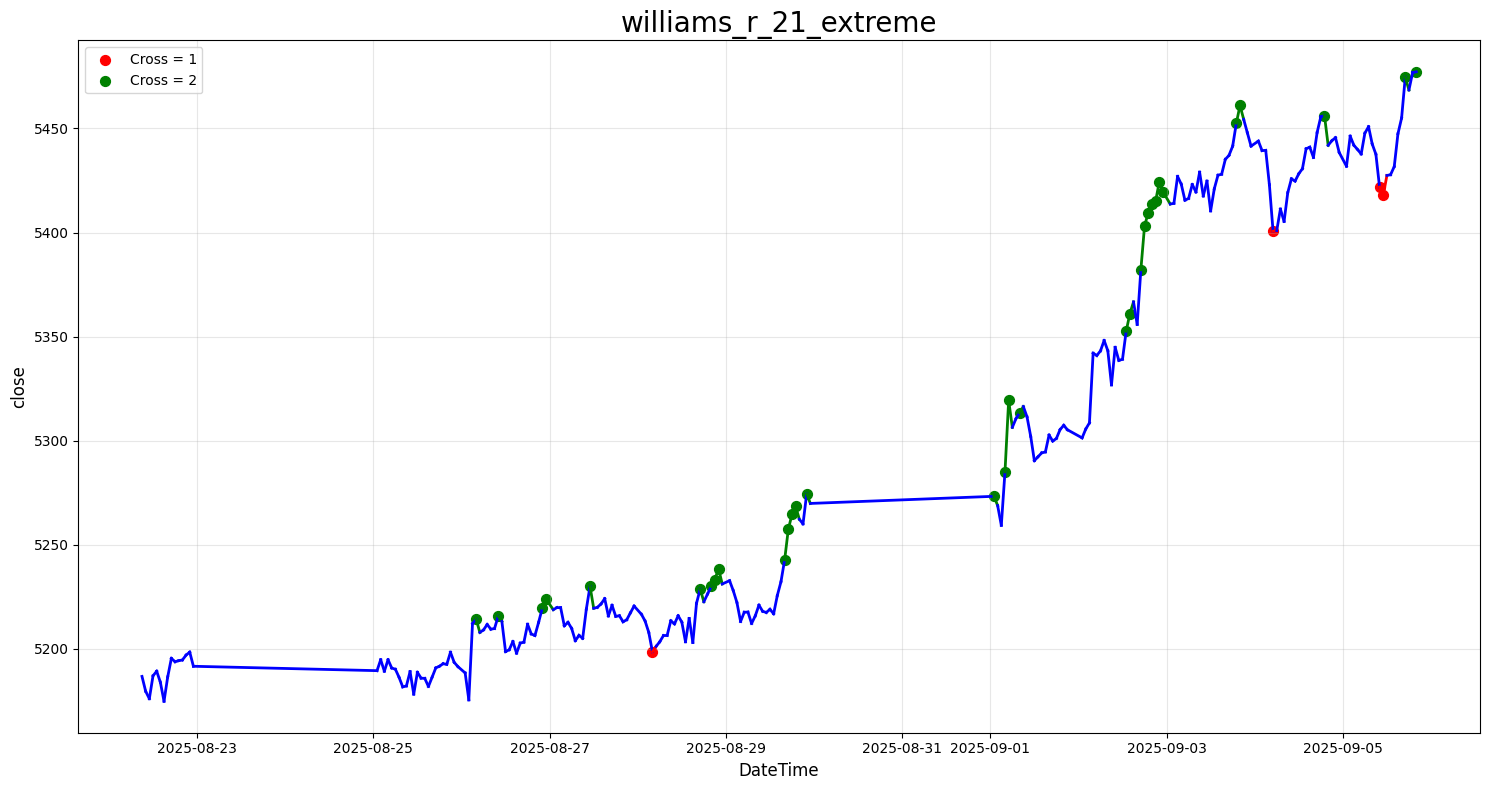

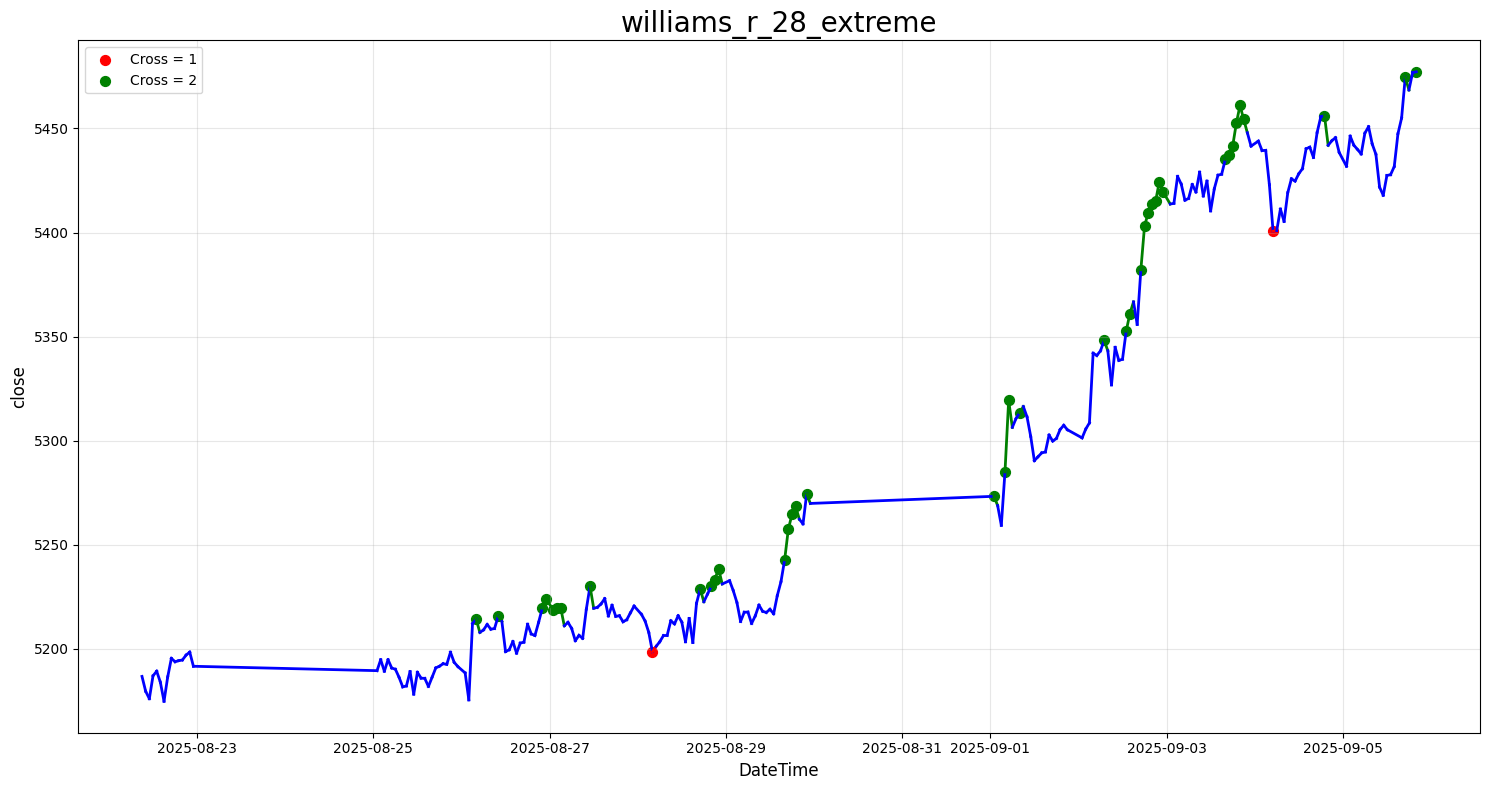

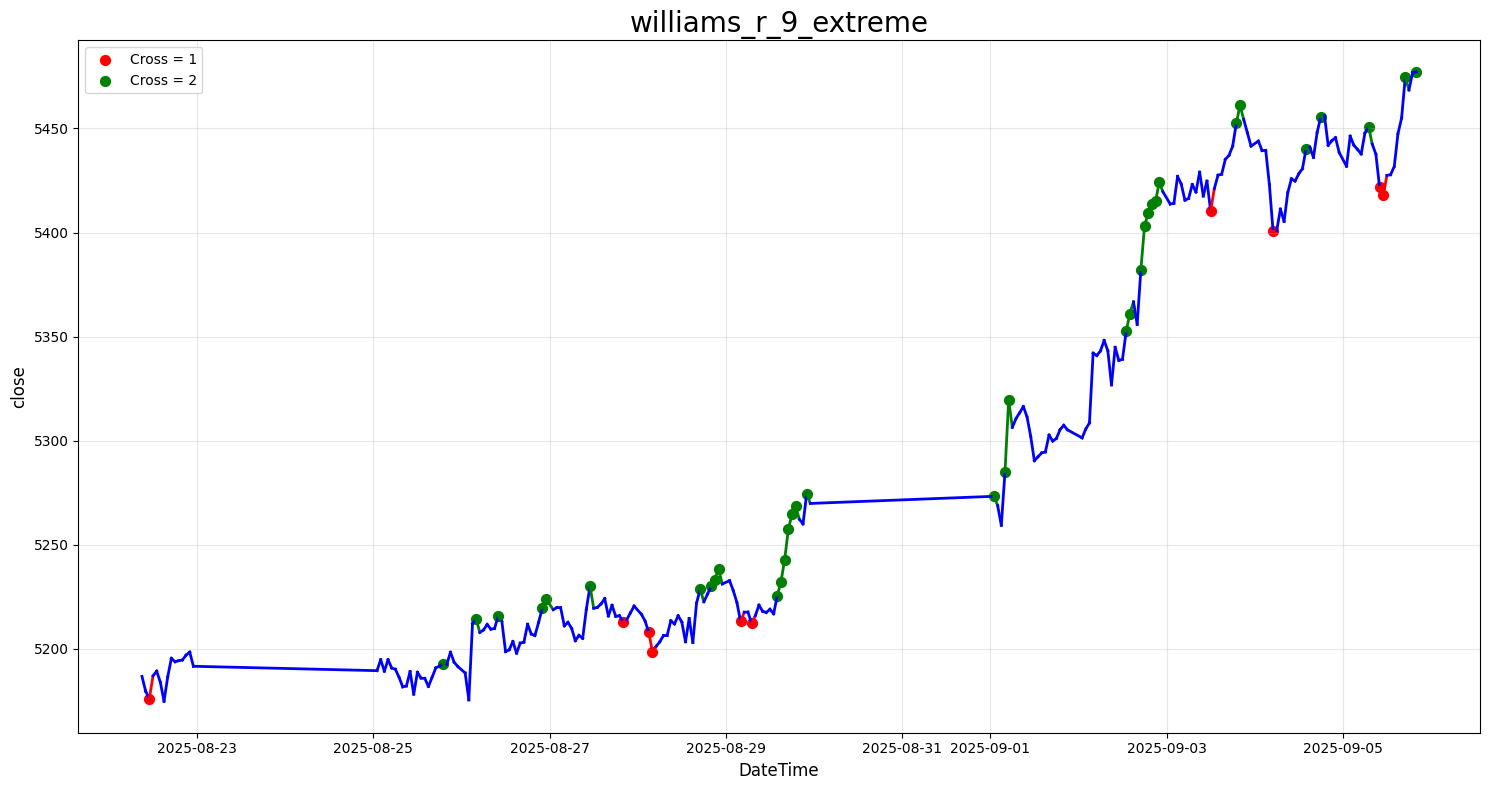

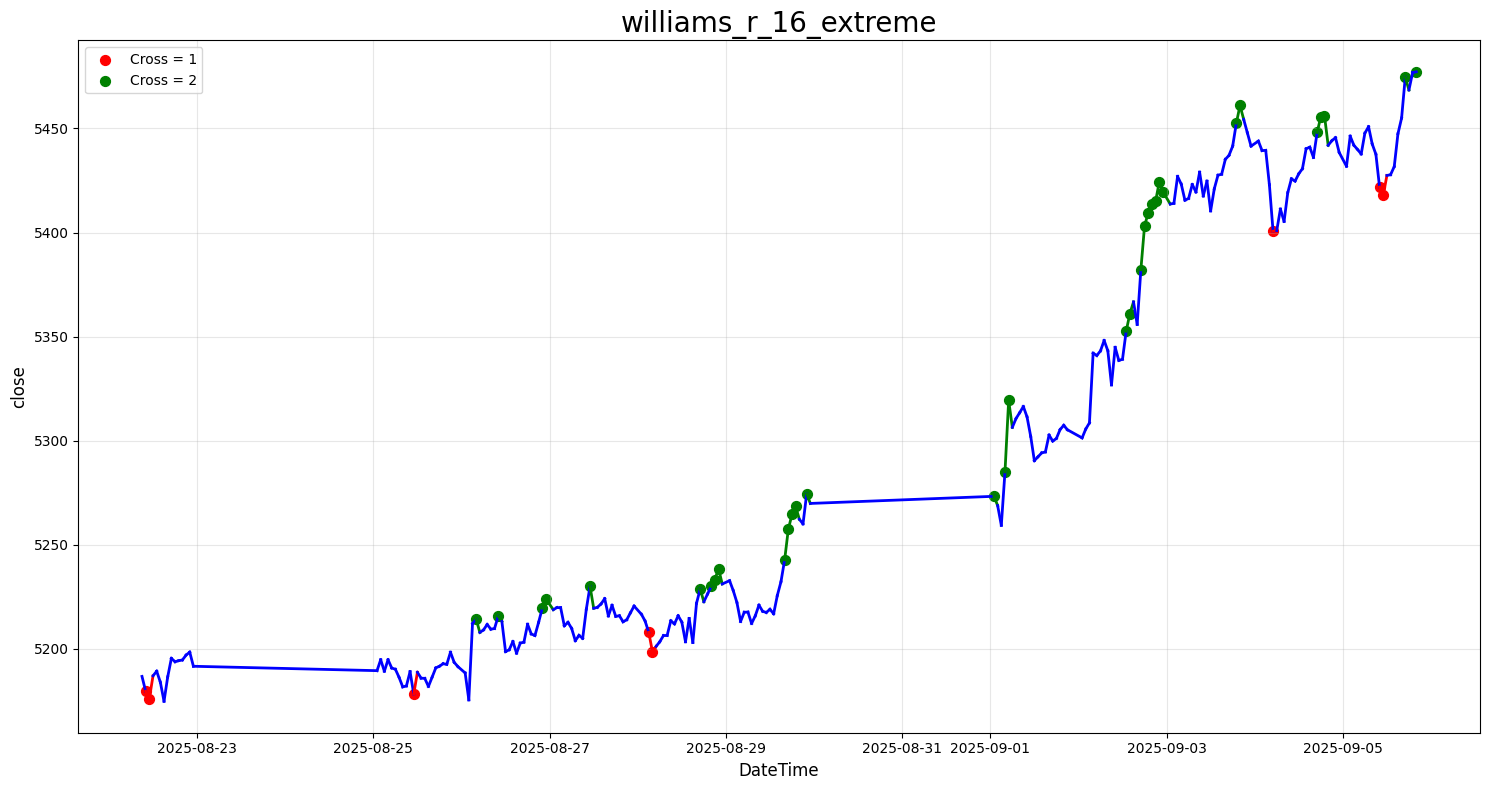

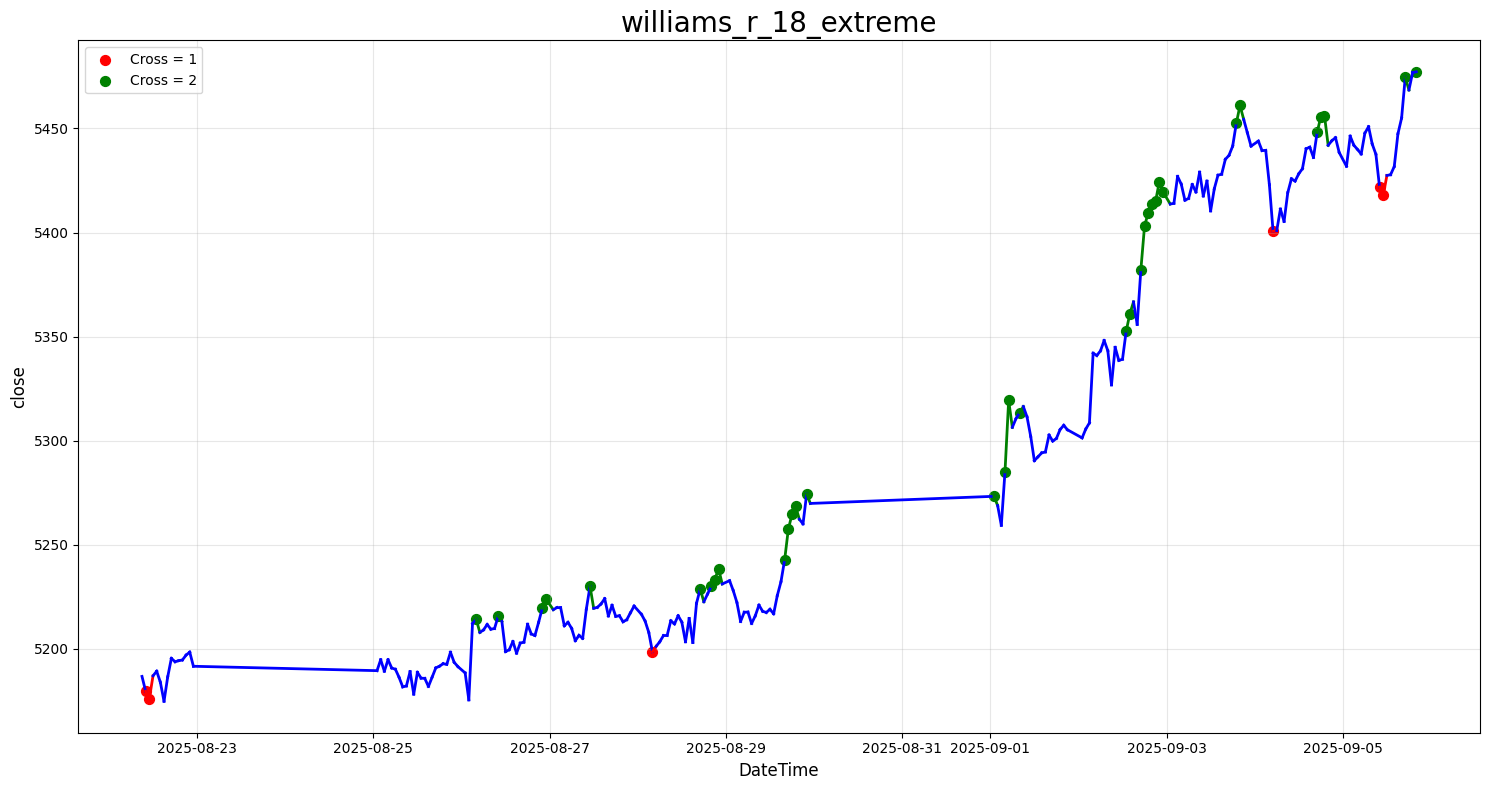

In [4]:
plotter = ForexPlotter(data = momentum_signals_data)
plotter.plot_signals(periods = 240)